In [1]:
import os
import numpy as np
from tqdm import tqdm
from pathlib import Path

fig_dir = "fig"
model_name = "gpt2-small"
stat = "p_matrix"
knowledge_type = "known"

file_dir = Path(f"../data/{stat}") / model_name / f"{knowledge_type}_sample_size_128" 
print(f"Current proecss folder: {file_dir}")
files = list(file_dir.glob("layer_*.npy"))
files.sort(key=lambda x: int(str(x).split("_")[-5]))

p_matrices = []

for file in tqdm(files):
    p_matrix = np.load(file)
    p_matrices.append(p_matrix)

Current proecss folder: data/p_matrix/gpt2-small/known_sample_size_128


100%|██████████| 12/12 [00:00<00:00, 2842.63it/s]


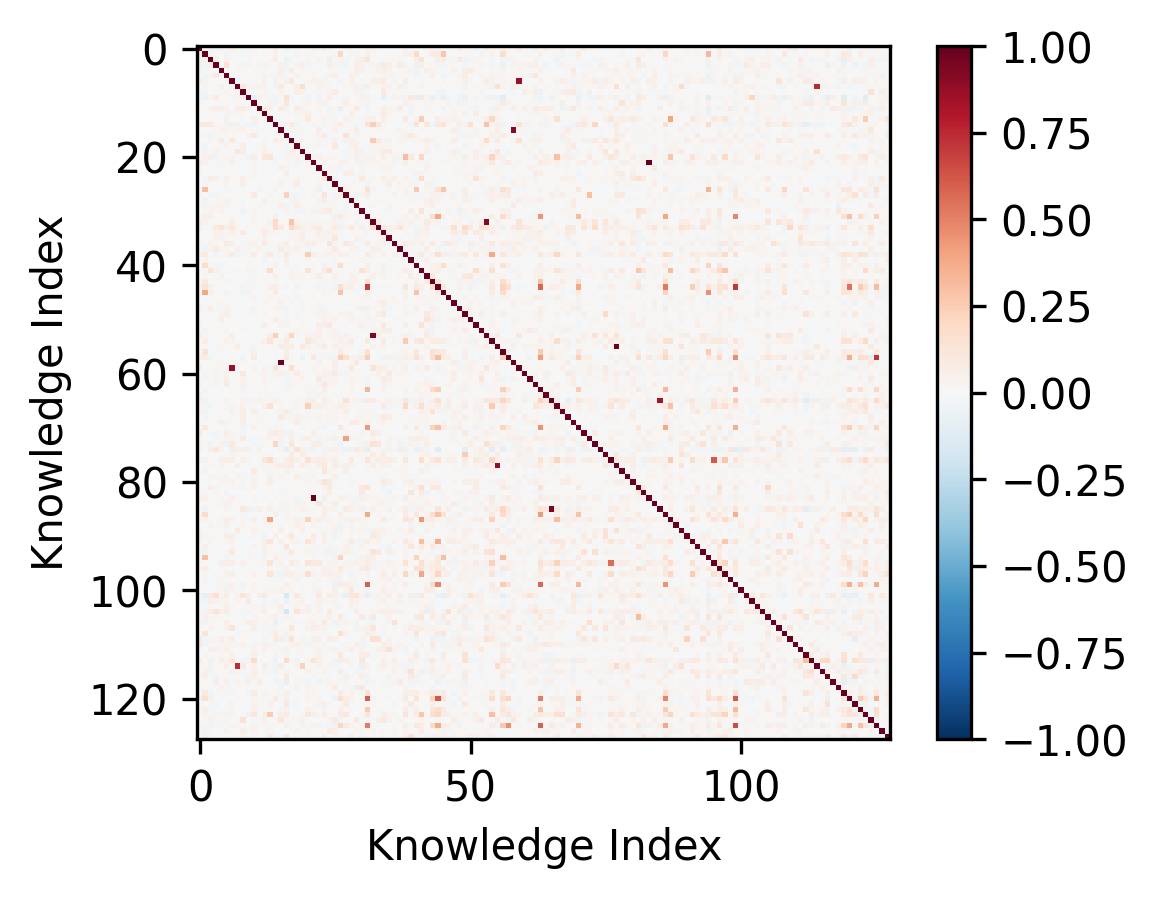

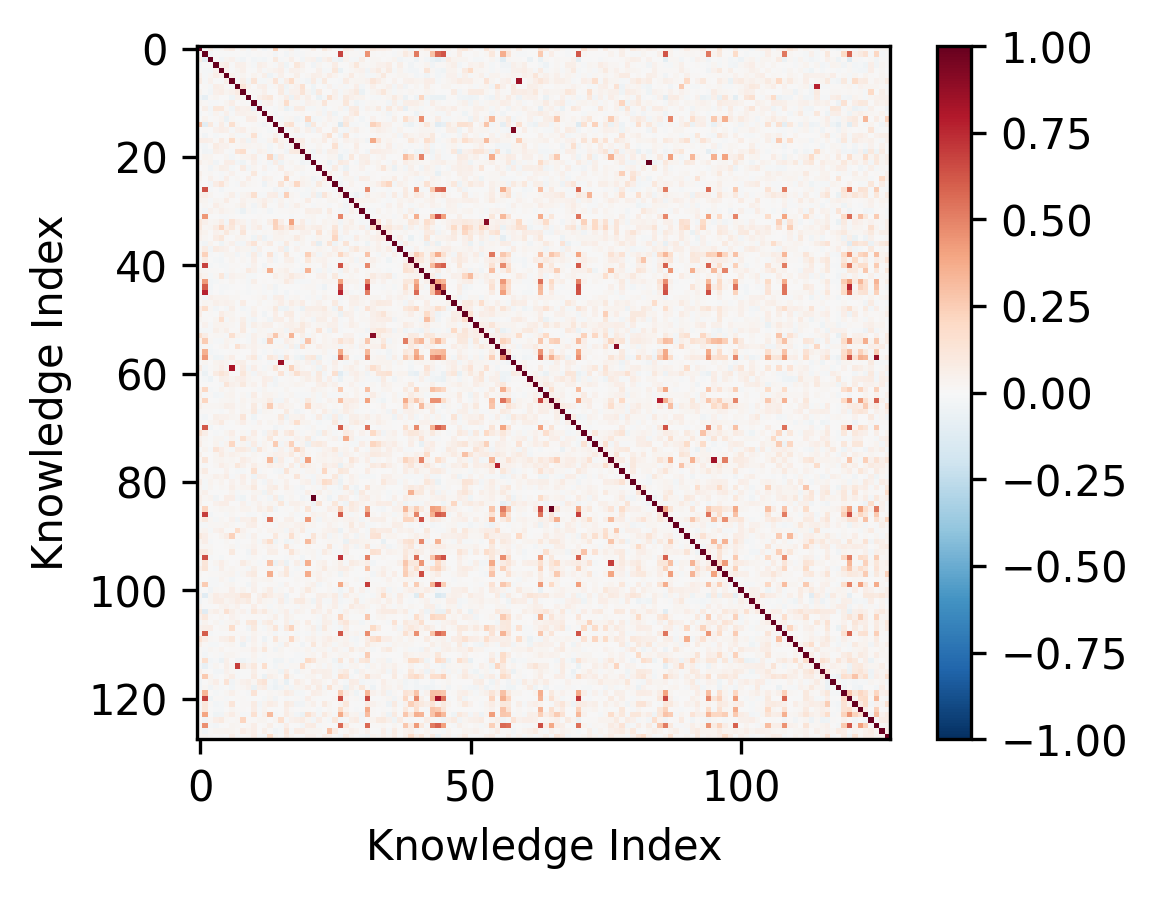

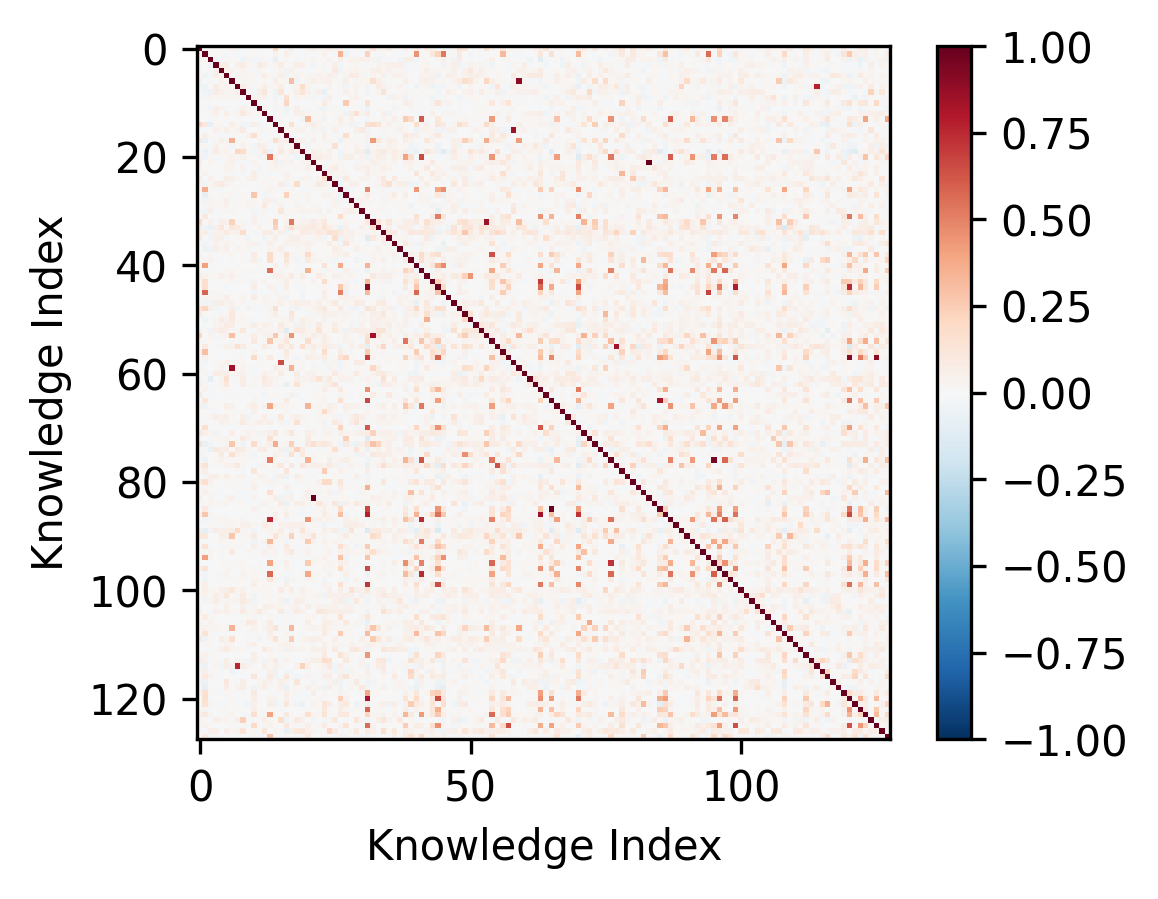

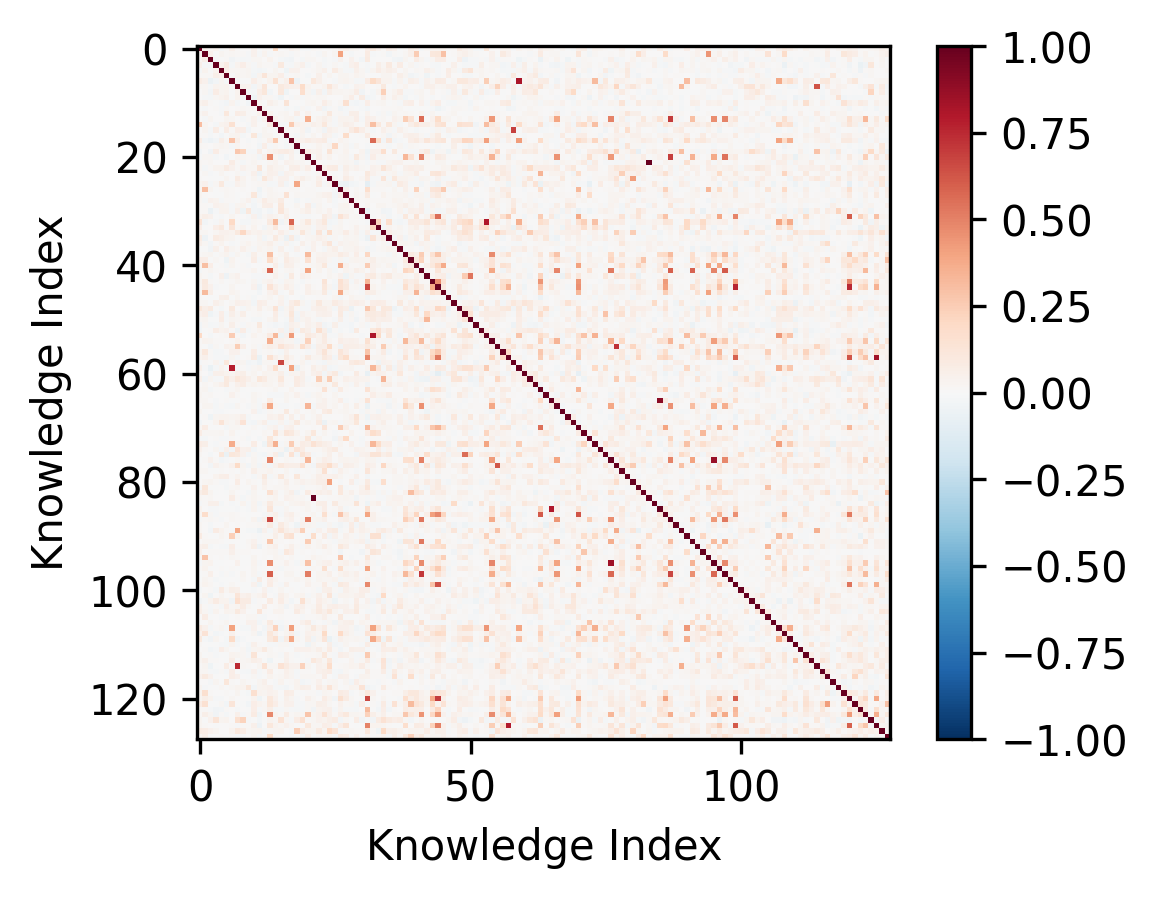

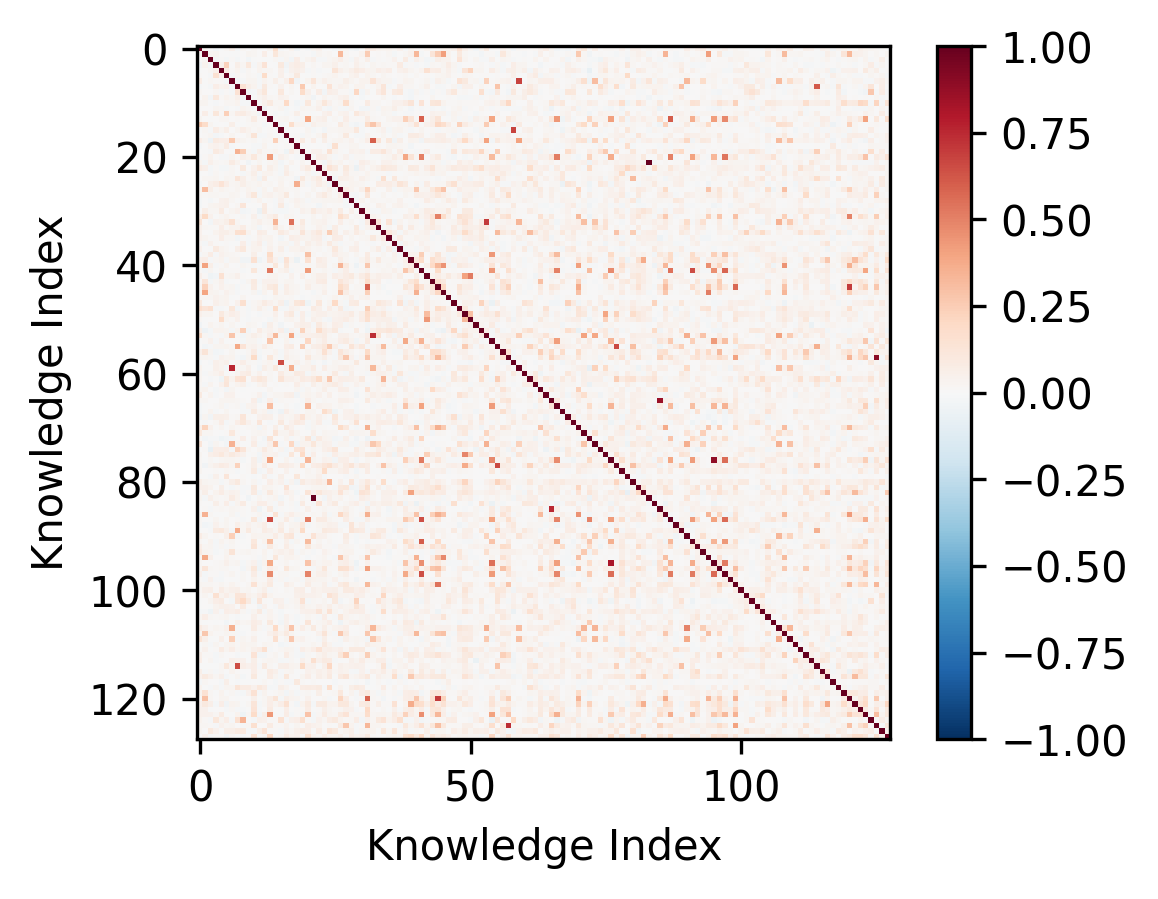

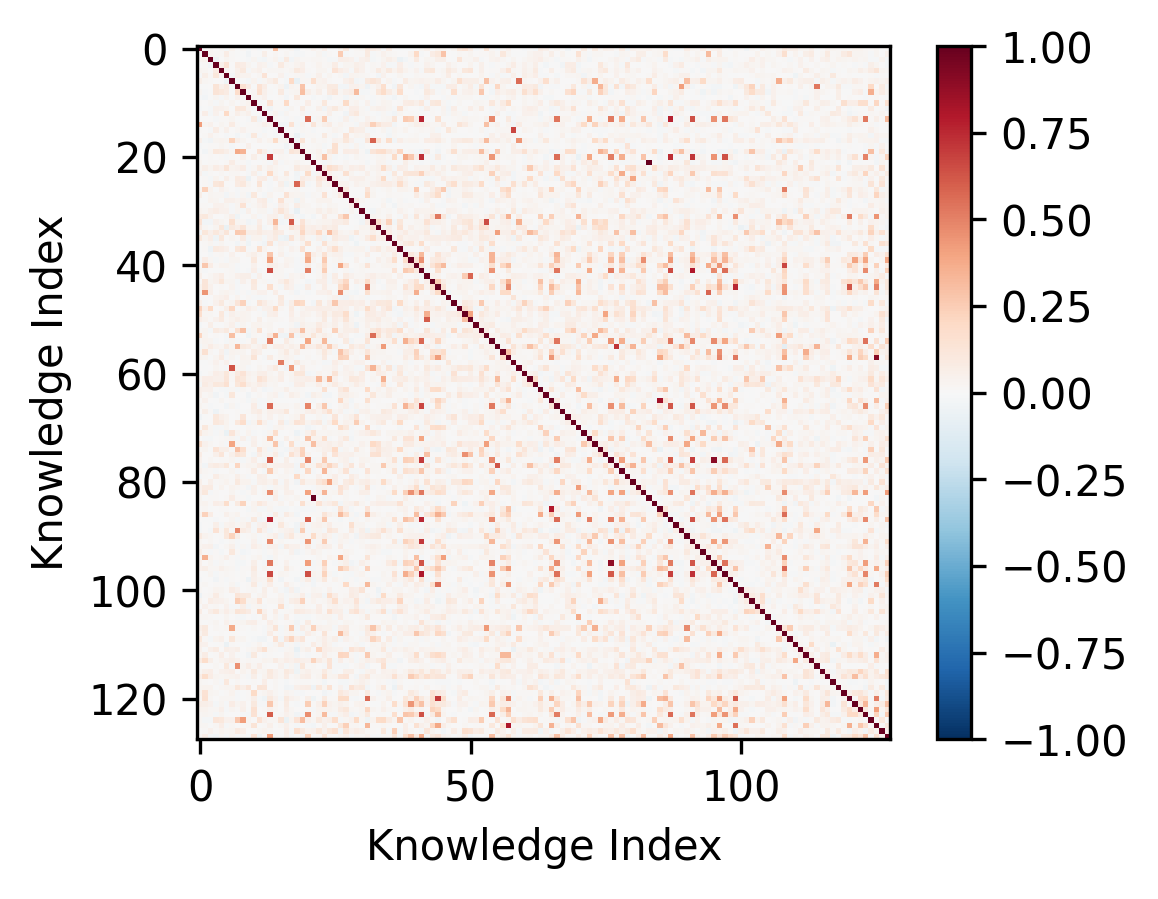

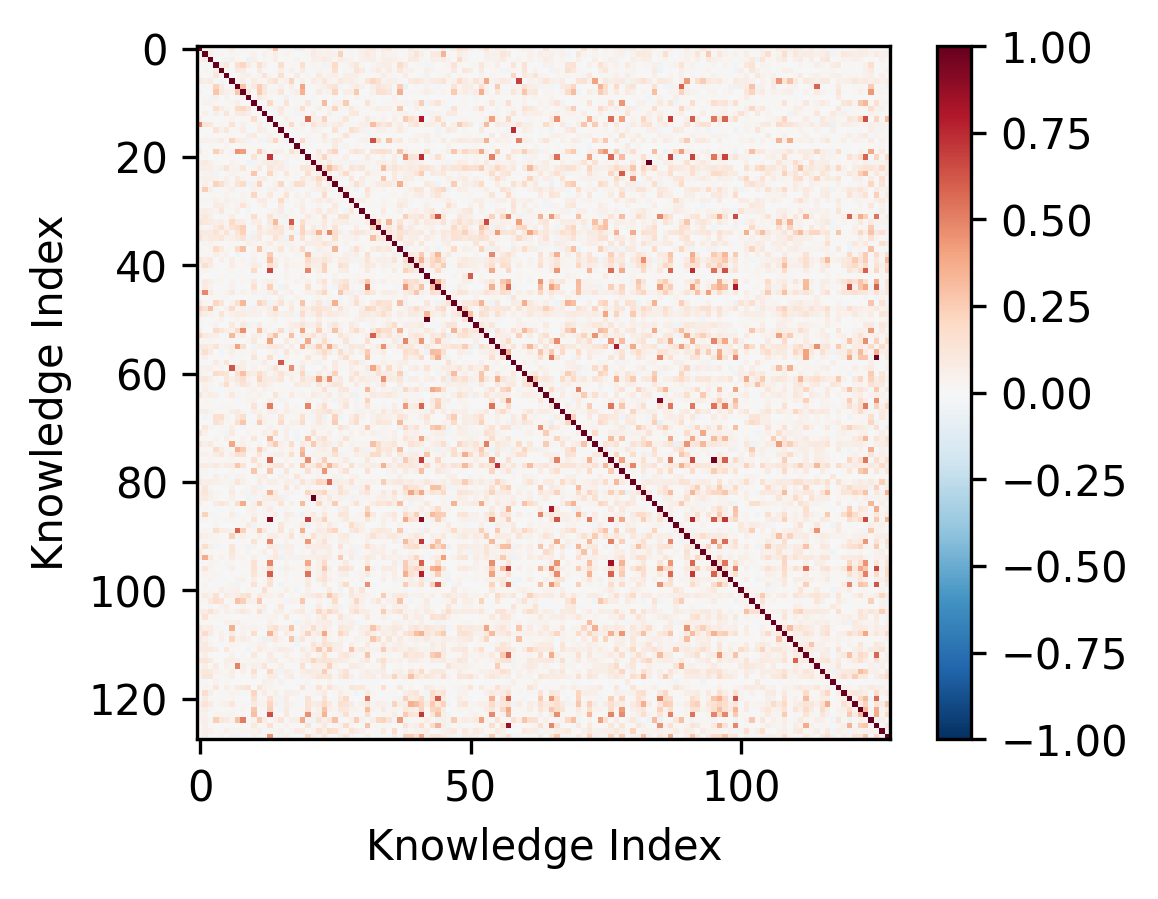

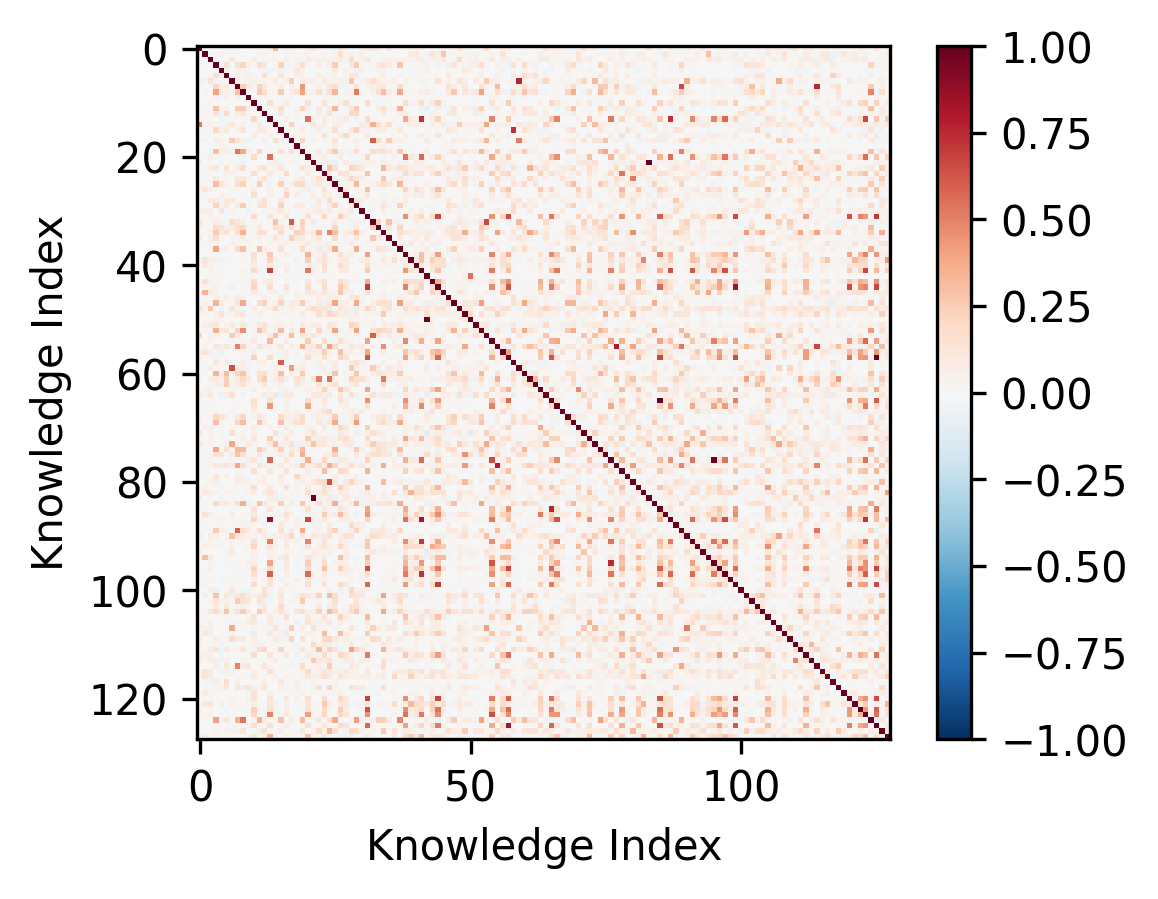

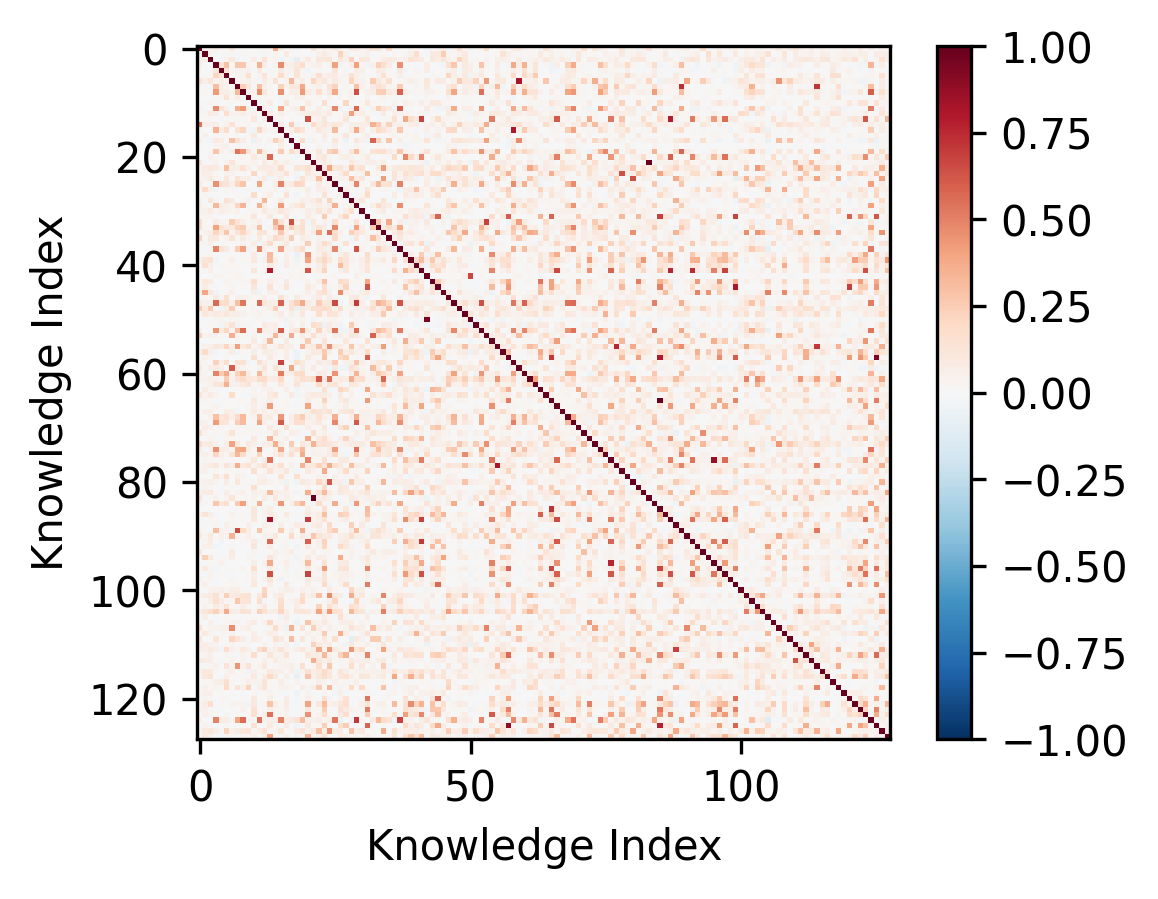

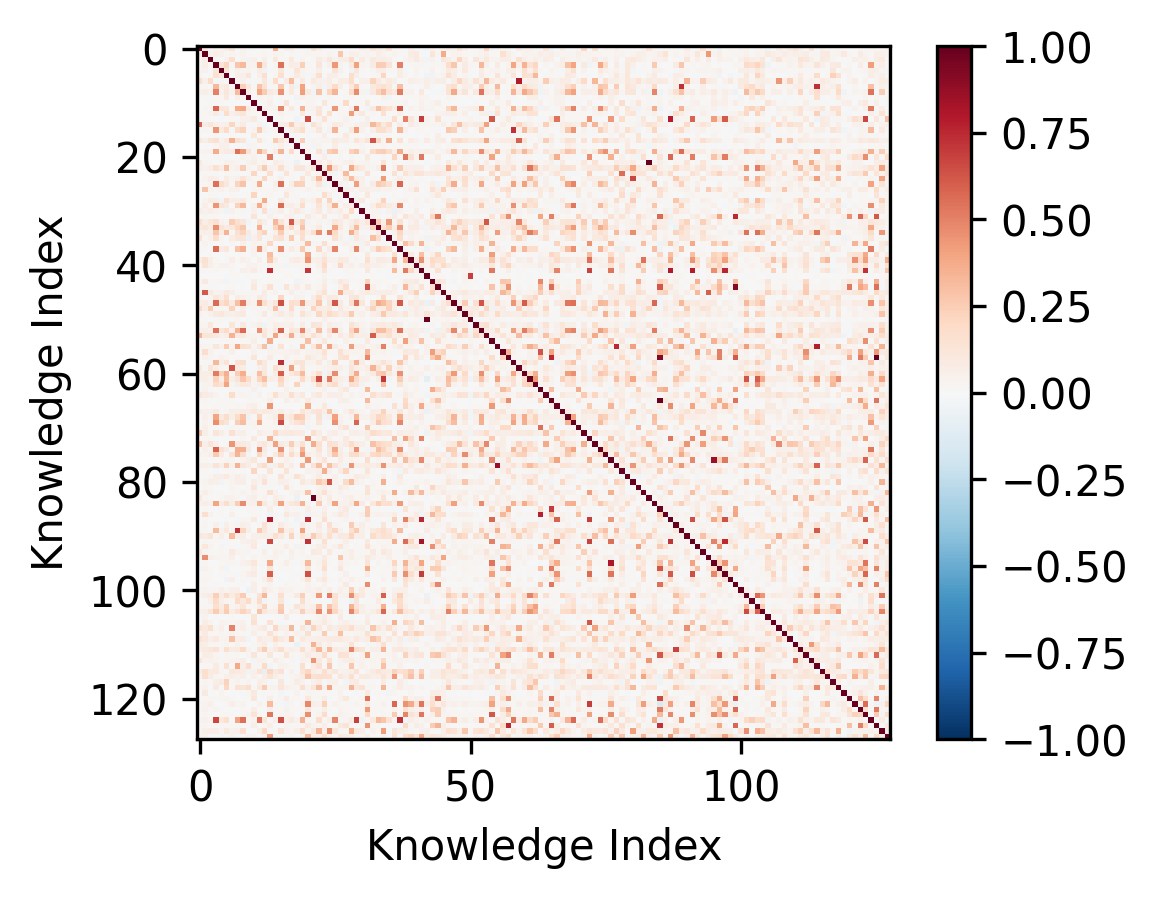

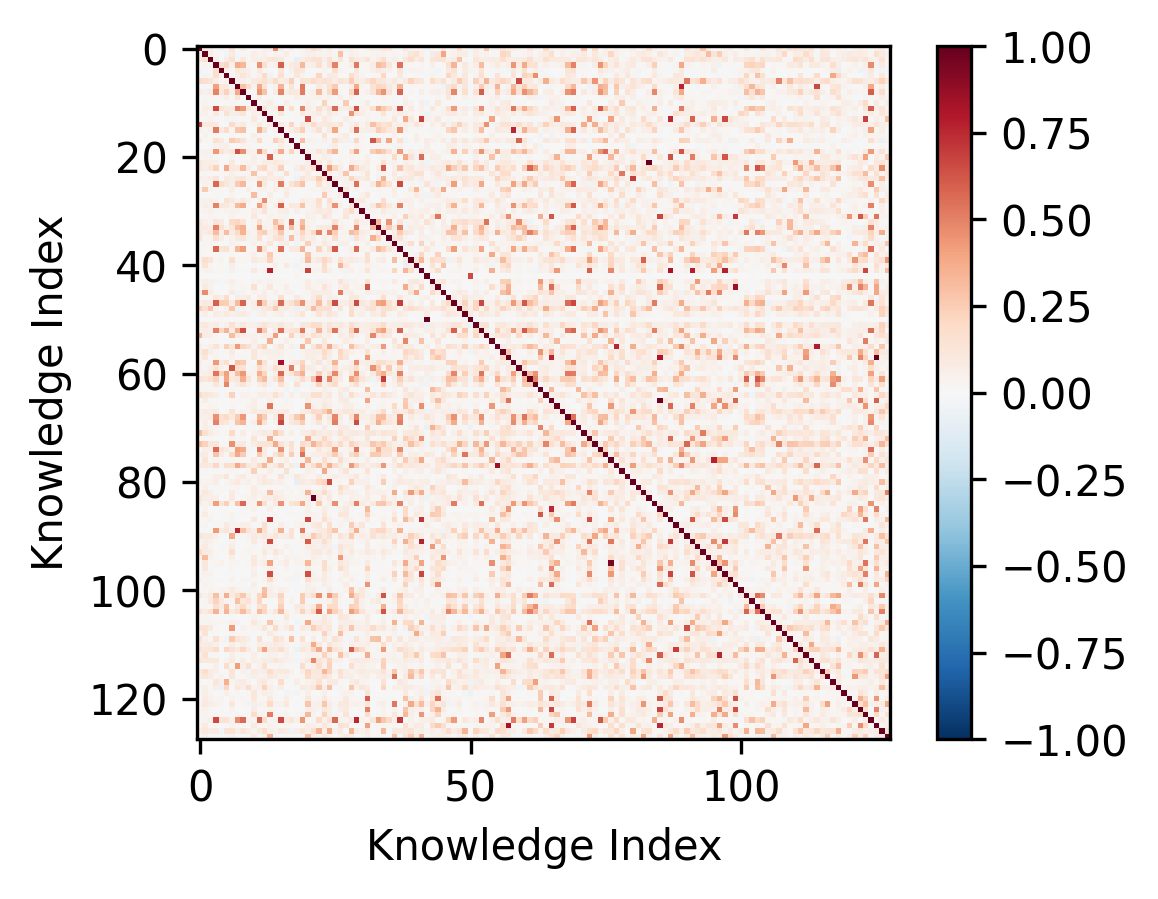

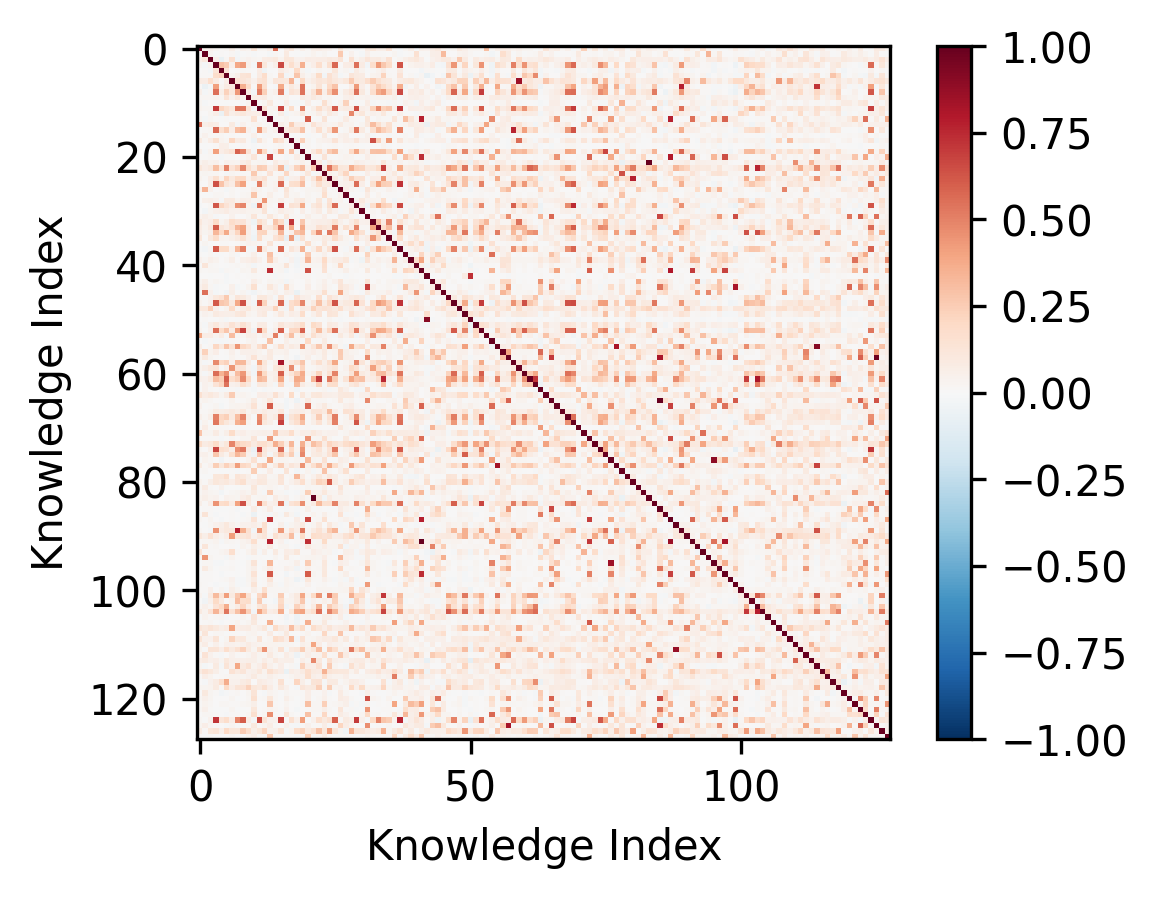

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

for i in range(len(p_matrices)):
    # 使用 Matplotlib 绘制热图
    plt.figure(figsize=(4, 3), dpi=300)    
    norm = mcolors.TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
    # 绘制热图
    plt.imshow(p_matrices[i], cmap="RdBu_r", norm=norm, interpolation='nearest')
    plt.colorbar()  # 添加颜色条
    plt.title(f'Superposition for Layer {i}')  # 图形标题
    plt.xlabel('Knowledge Index')  # x 轴标签
    plt.ylabel('Knowledge Index')  # y 轴标签
    # Save the figure as a high-resolution image
    #output_dir = f'{fig_dir}/{model_name}/{stat}/{knowledge_type}/heatmap'
    #os.makedirs(output_dir, exist_ok=True)
    #plt.savefig(f"{output_dir}/superposition_for_layer_{i}.png", format='png', dpi=300, bbox_inches='tight')
    plt.show()


In [3]:
import numpy as np

def get_top_k_coordinates(matrix, k):
    
    rows, cols = matrix.shape
    elements_with_coords = []
    
    # 遍历矩阵的每一个元素
    for i in range(rows):
        for j in range(cols):
            # 跳过对角线上的元素
            if i == j:
                continue
            # 将元素值和坐标加入列表
            elements_with_coords.append((matrix[i, j], (i, j)))
    
    # 按元素值降序排序
    elements_with_coords.sort(reverse=True, key=lambda x: x[0])
    # 获取前k个元素的坐标
    top_k_coordinates = [coords for _, coords in elements_with_coords[:k]]
    
    return top_k_coordinates


result = get_top_k_coordinates(p_matrices[0], 20)
print(result)  

[(21, 83), (83, 21), (55, 77), (58, 15), (85, 65), (53, 32), (32, 53), (15, 58), (77, 55), (6, 59), (59, 6), (65, 85), (7, 114), (114, 7), (44, 99), (57, 125), (44, 31), (125, 99), (120, 44), (76, 95)]


In [4]:
import json

with open("data/intersected_counterfact_known.json", "r") as f:
    ds = json.load(f)

In [5]:
for i,j in result:
    print(f"======>{p_matrices[0][i,j]}<======")
    print(ds[i]["requested_rewrite"]["prompt"].format(f"[{ds[i]['requested_rewrite']['subject']}]") + f" [{ds[i]['requested_rewrite']['target_true']['str']}]")
    print(ds[j]["requested_rewrite"]["prompt"].format(f"[{ds[j]['requested_rewrite']['subject']}]") + f" [{ds[j]['requested_rewrite']['target_true']['str']}]")

======>1.0<======
[University of Washington] is based in [Seattle]
[University of Washington] is located in [Seattle]
======>1.0<======
[University of Washington] is located in [Seattle]
[University of Washington] is based in [Seattle]
======>0.9851769208908081<======
[Vladimir Mayakovsky] is a native speaker of [Russian]
[Vladimir Bukovsky] is a native speaker of [Russian]
======>0.9767935276031494<======
The native language of [Patrick Rambaud] is [French]
The native language of [Pierre Trabaud] is [French]
======>0.9414277076721191<======
[Mac OS X 10.1], a product developed by [Apple]
[Windows 8.1], a product developed by [Microsoft]
======>0.9309584498405457<======
In [Independent State of Croatia], the language spoken is [Croatian]
The official language of [Croatia] is [Croatian]
======>0.9272693395614624<======
The official language of [Croatia] is [Croatian]
In [Independent State of Croatia], the language spoken is [Croatian]
======>0.906720757484436<======
The native language 

In [6]:
p_matrices_flatten = []

for i in range(len(p_matrices)):
    p_matrices_flatten.append(p_matrices[i][~np.eye(p_matrices[i].shape[0], dtype=bool)])

In [7]:
p_matrices[0]

array([[ 1.00000000e+00,  1.95511542e-02, -3.42094377e-02, ...,
         2.36038119e-02,  2.20138188e-02,  1.39439106e-02],
       [ 1.04508111e-02,  1.00000000e+00,  3.63005623e-02, ...,
         1.65620260e-02, -2.53108852e-02,  3.03574037e-02],
       [-3.51092294e-02,  6.96102008e-02,  1.00000000e+00, ...,
        -4.39135283e-02,  3.55765633e-02, -2.54364405e-02],
       ...,
       [ 2.47329567e-02,  3.24339271e-02, -4.48547155e-02, ...,
         1.00000000e+00, -4.25014732e-04, -1.05808927e-02],
       [ 1.83038022e-02, -3.94146480e-02,  2.88554374e-02, ...,
        -3.58108955e-04,  1.00000000e+00, -9.69958864e-03],
       [ 1.20469732e-02,  4.89966534e-02, -2.13697832e-02, ...,
        -8.76710191e-03, -1.00315074e-02,  1.00000000e+00]])

In [8]:
p_matrices_flatten[0]

array([ 0.01955115, -0.03420944, -0.03517179, ...,  0.02466433,
       -0.0087671 , -0.01003151])

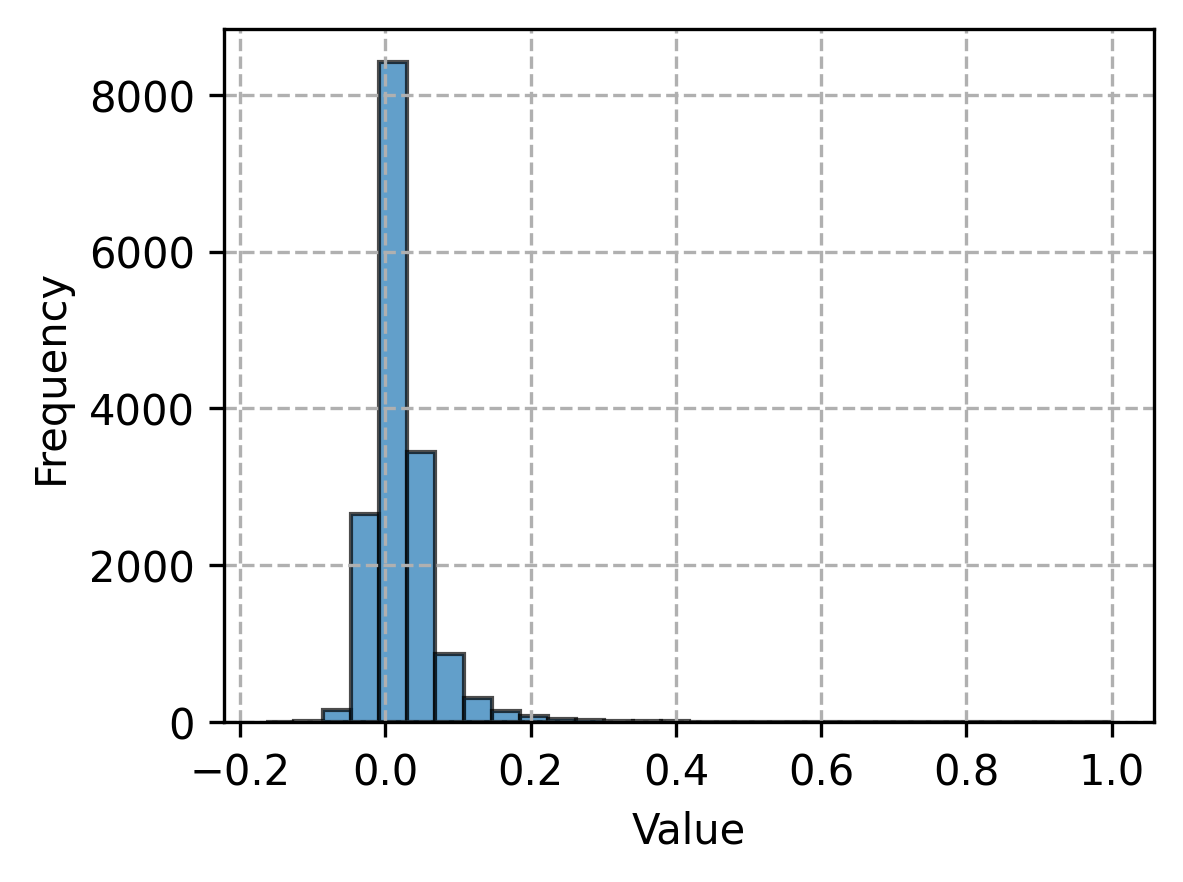

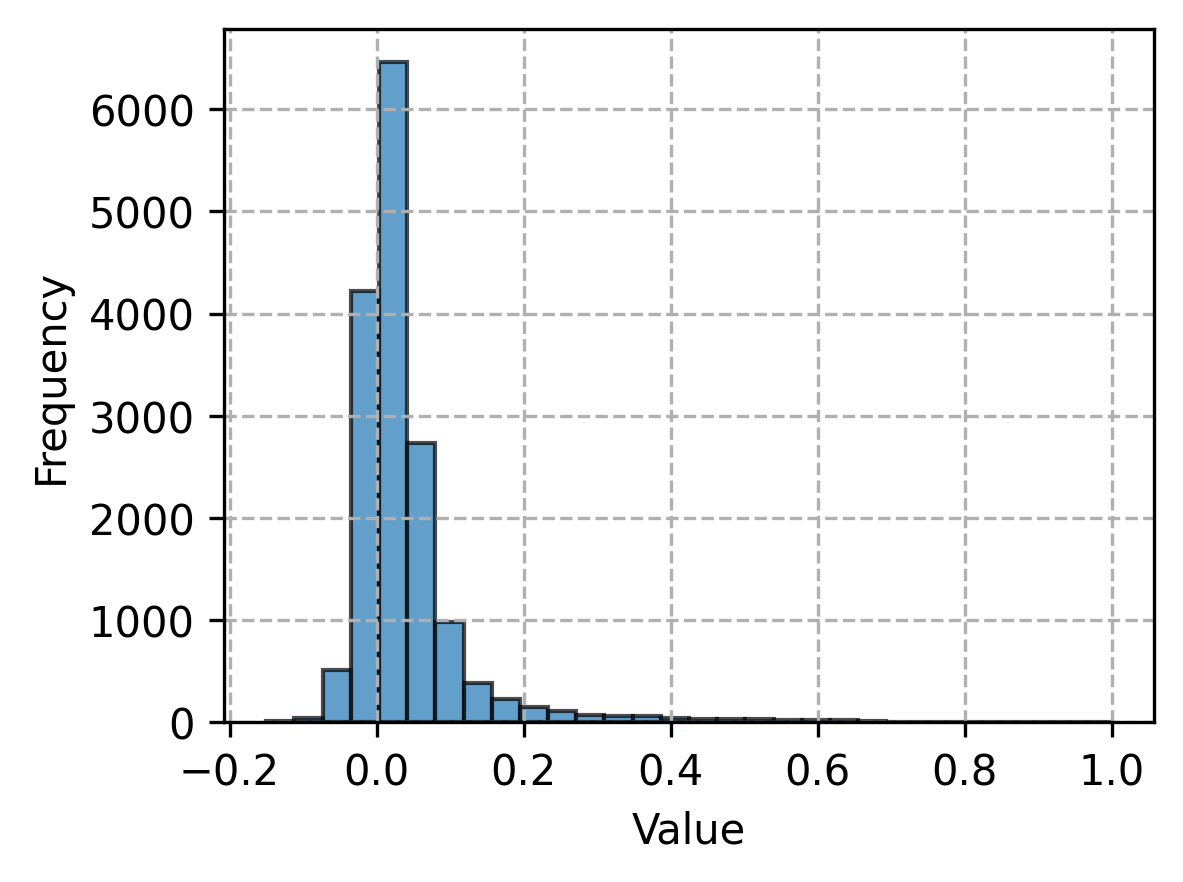

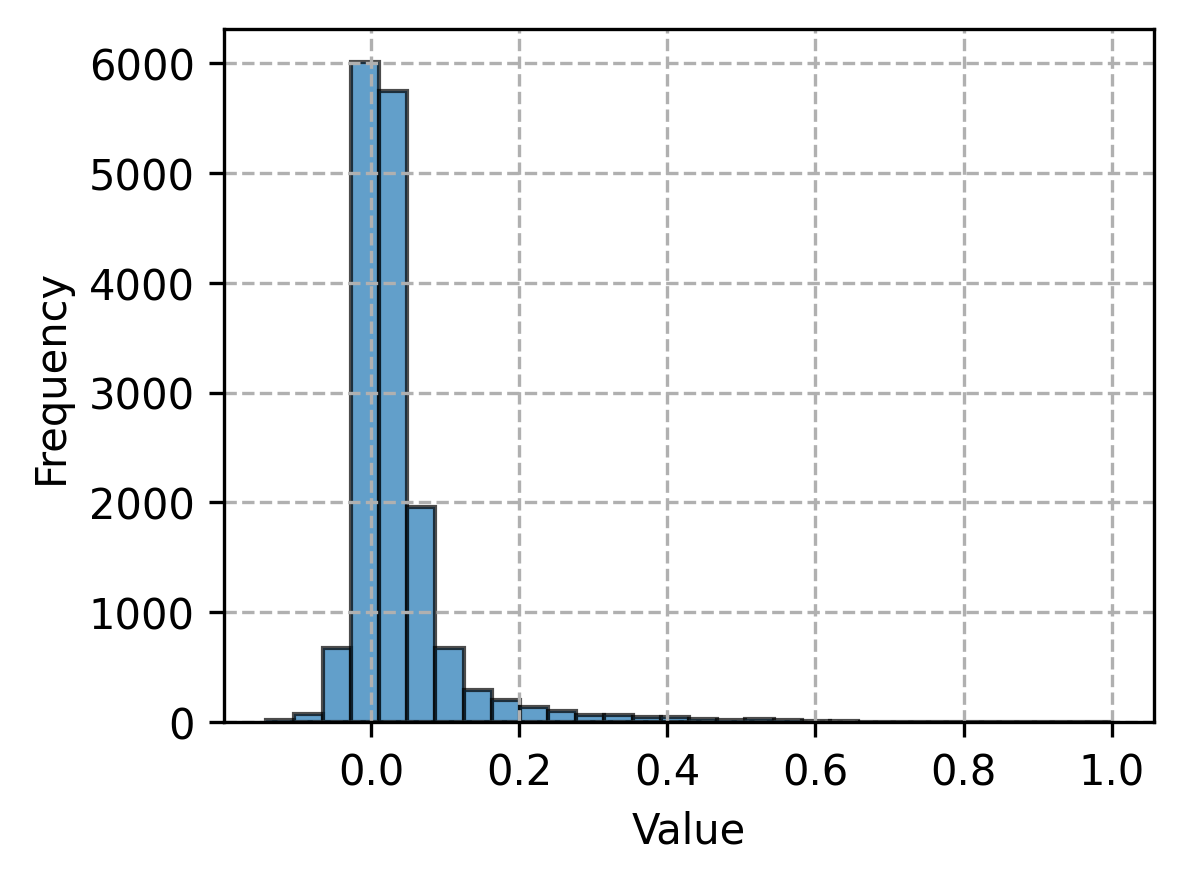

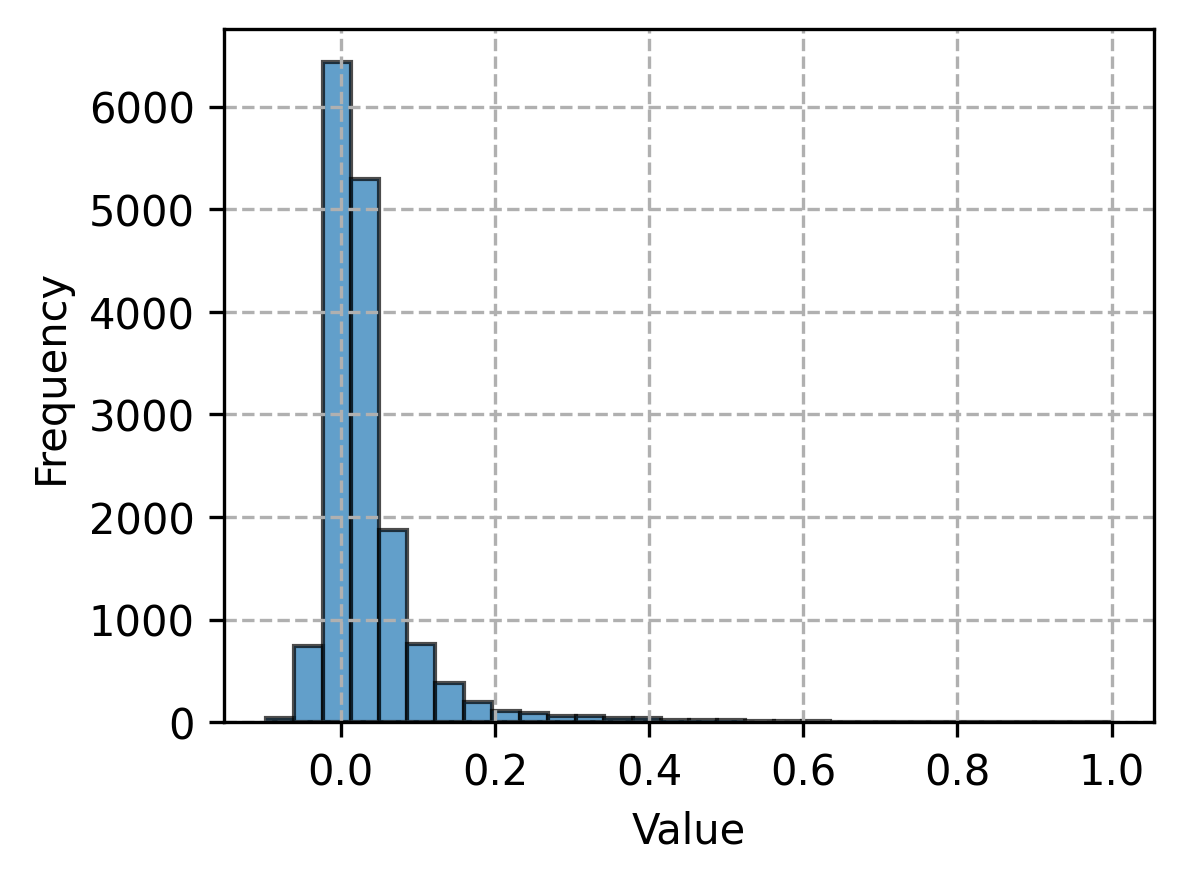

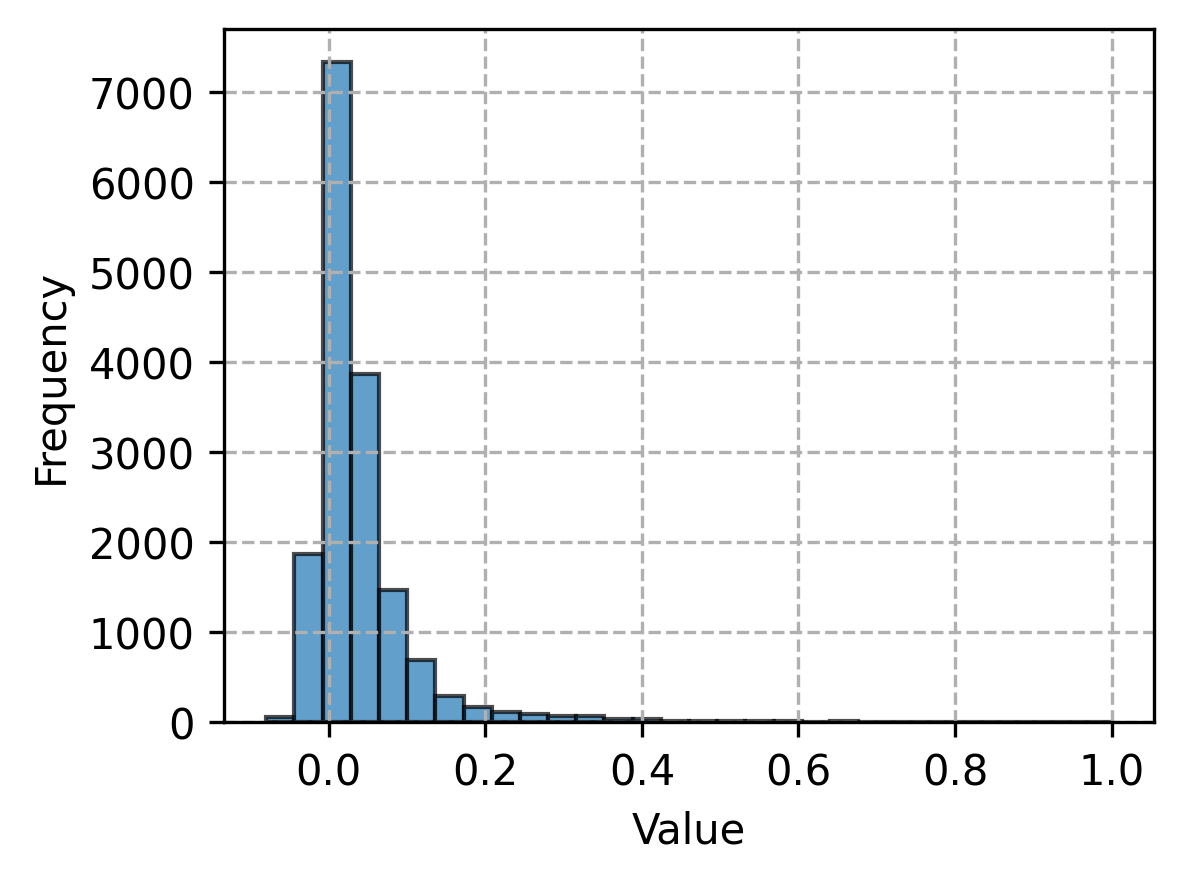

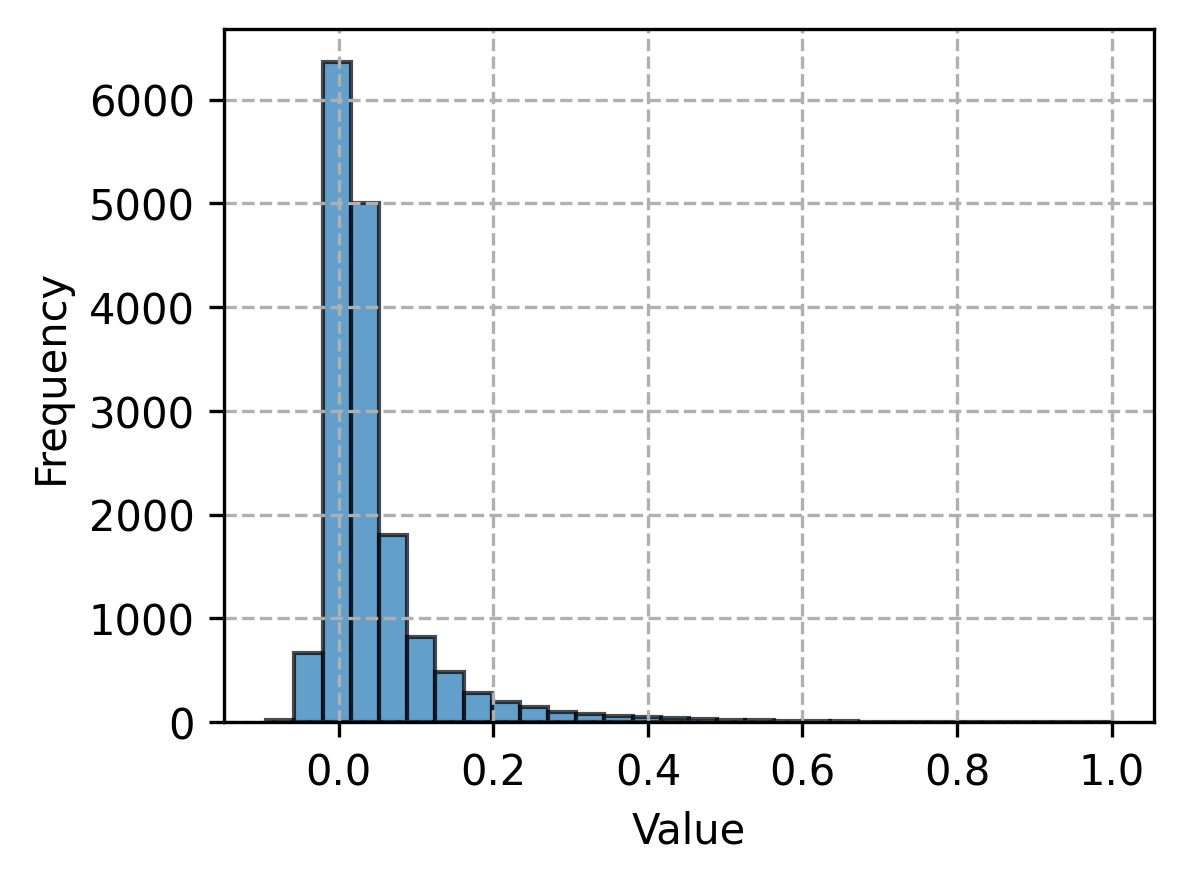

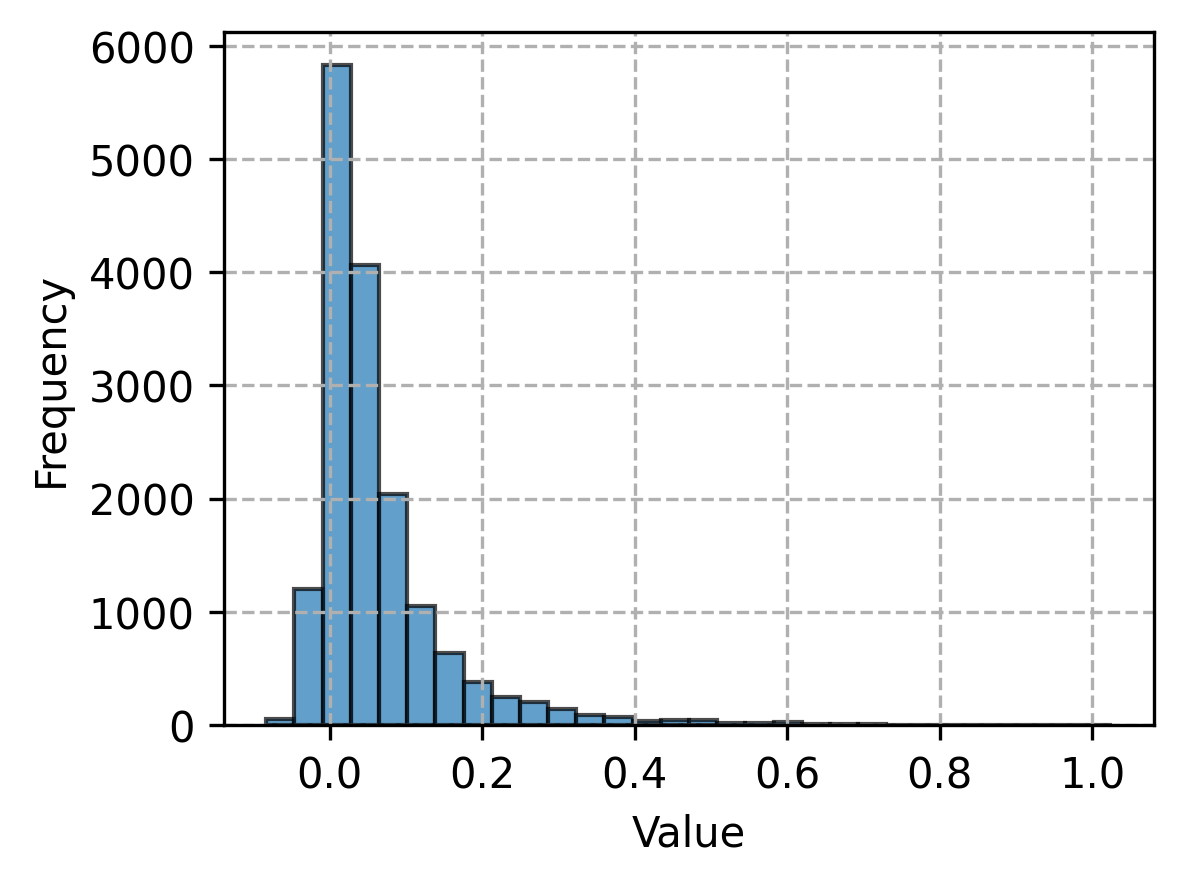

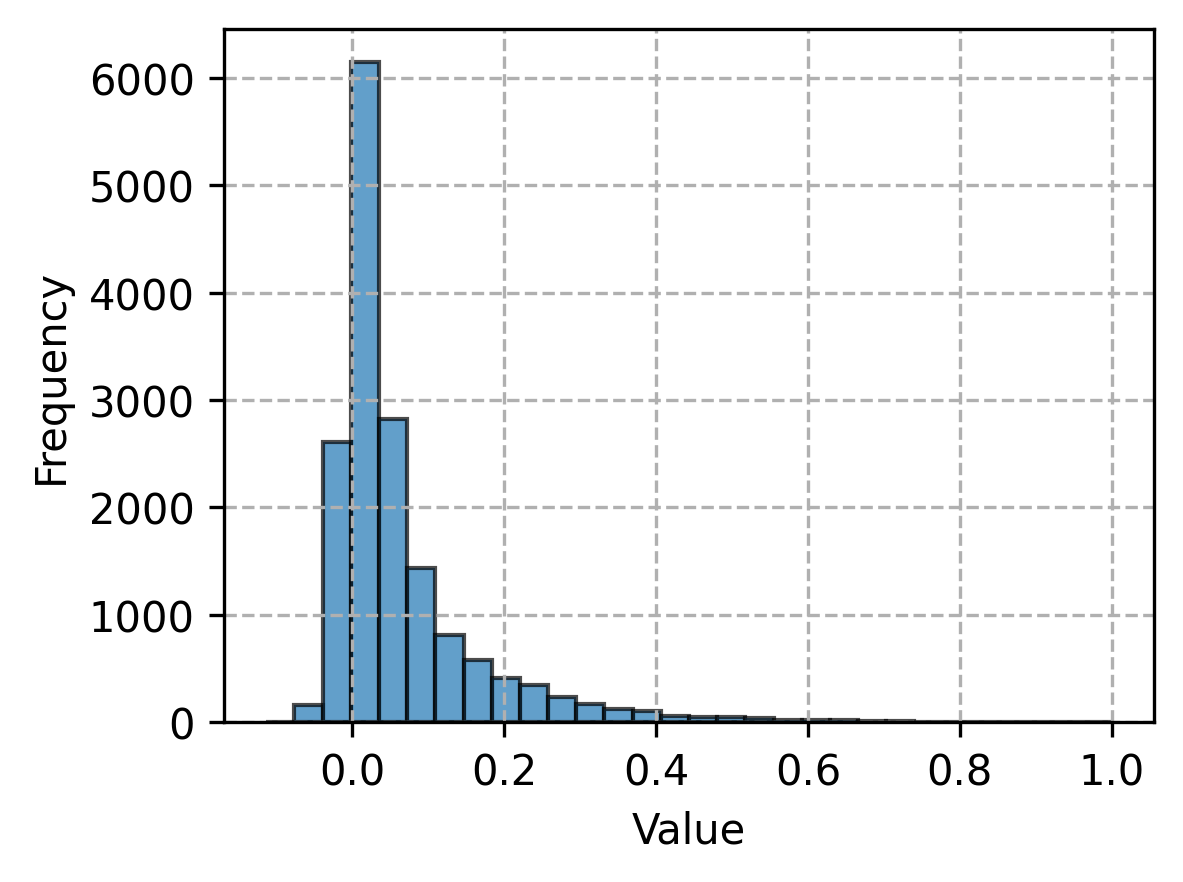

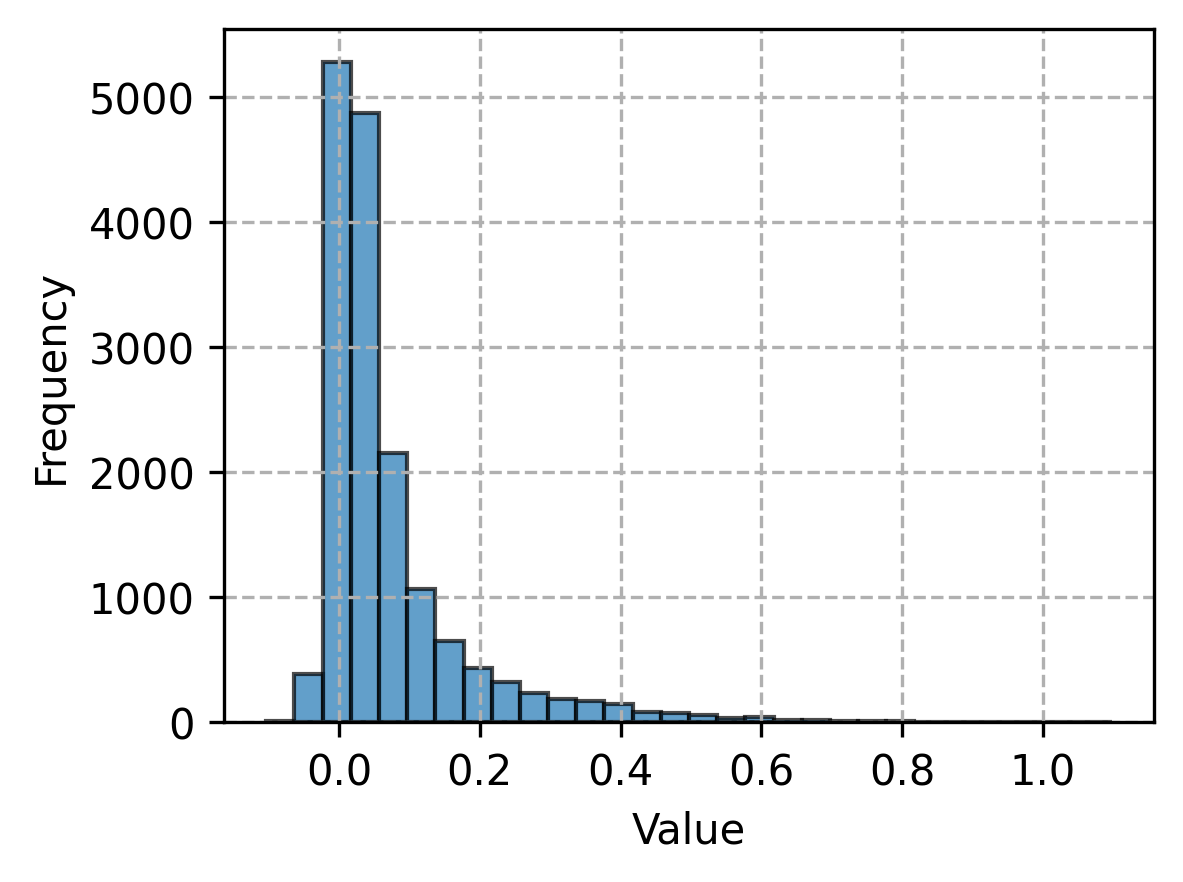

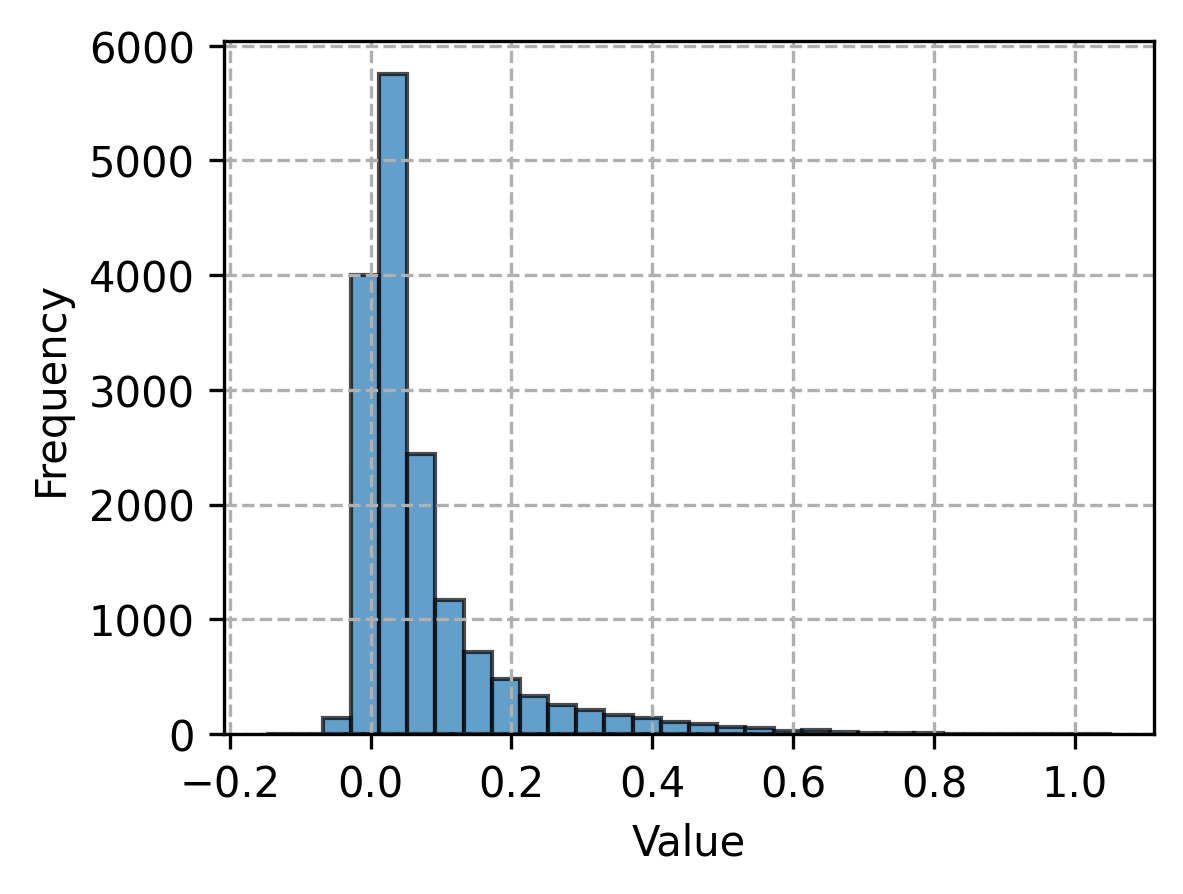

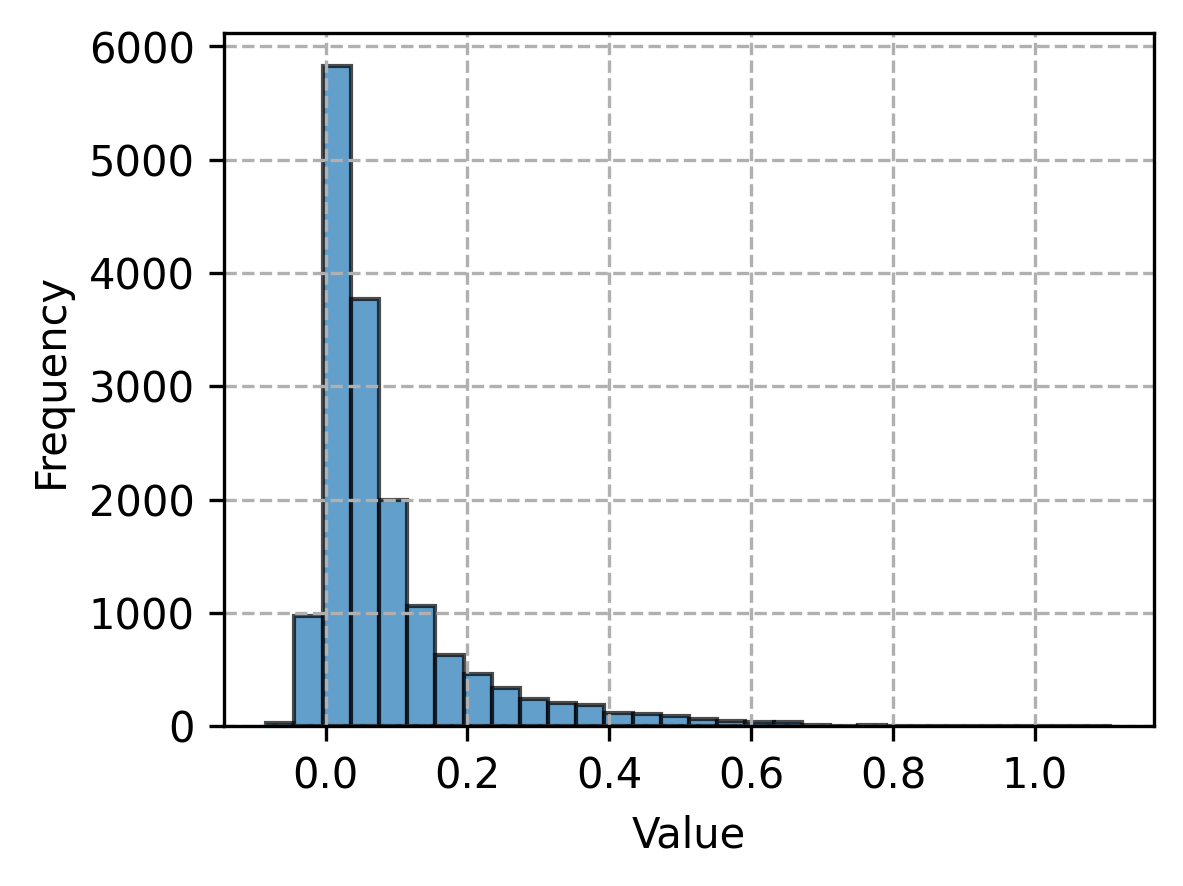

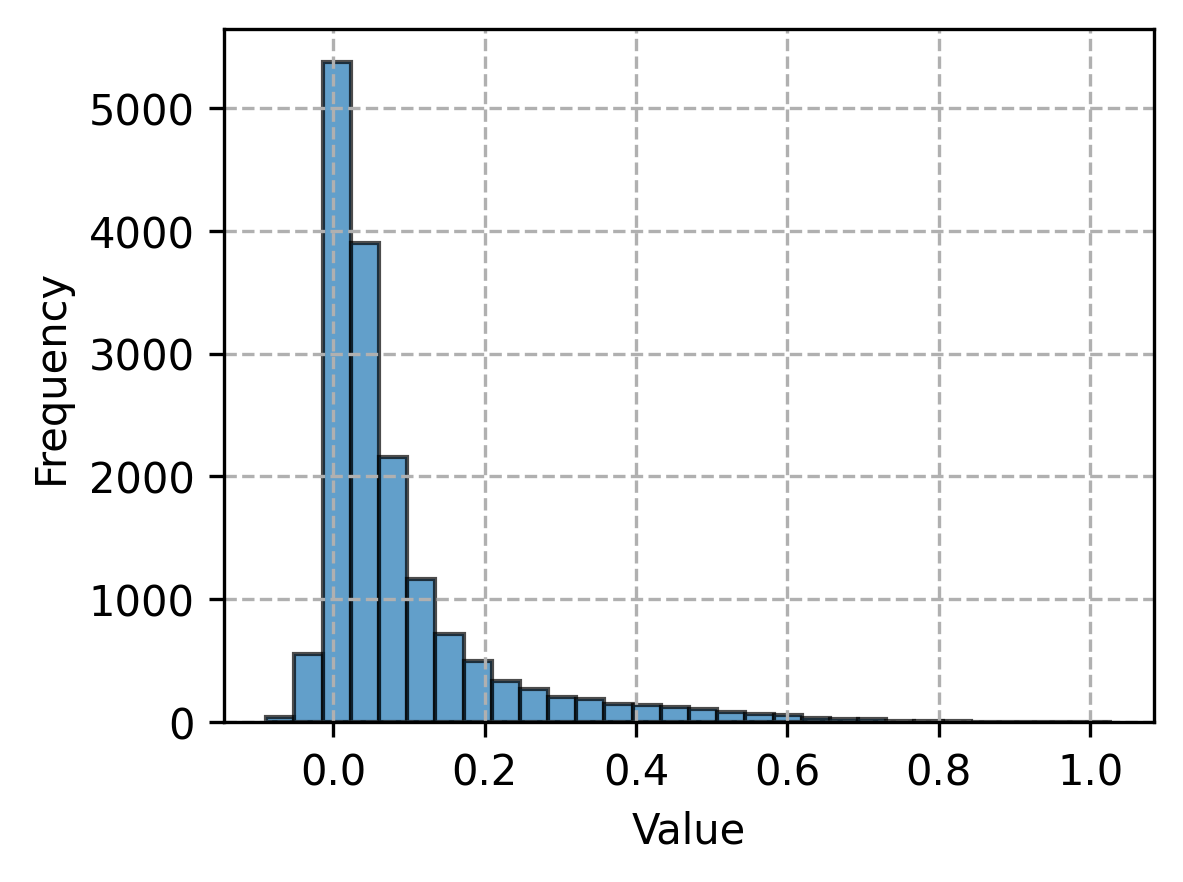

In [9]:
import numpy as np
import matplotlib.pyplot as plt

for i in range(len(p_matrices_flatten)):
    # 使用 Matplotlib 绘制直方图
    plt.figure(figsize=(4, 3), dpi=300)
    plt.hist(p_matrices_flatten[i], bins=30, edgecolor='black', alpha=0.7)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Elements in P Matrix for Layer {i}')
    plt.grid(True, linestyle='--')
    # Save the figure as a high-resolution image
    #output_dir = f'{fig_dir}/{model_name}/{stat}/{knowledge_type}/histogram'
    #os.makedirs(output_dir, exist_ok=True)
    #plt.savefig(f"{output_dir}/superposition_for_layer_{i}.png", format='png', dpi=300, bbox_inches='tight')
    plt.show()


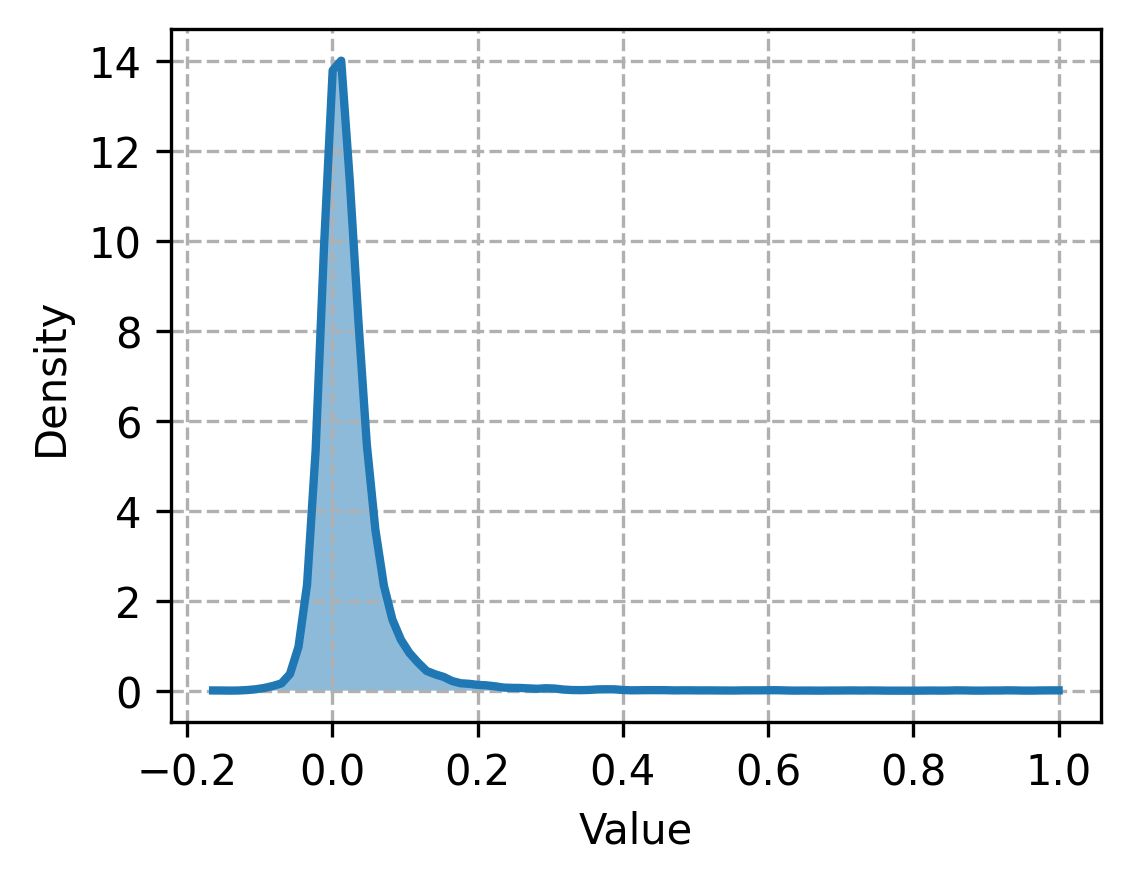

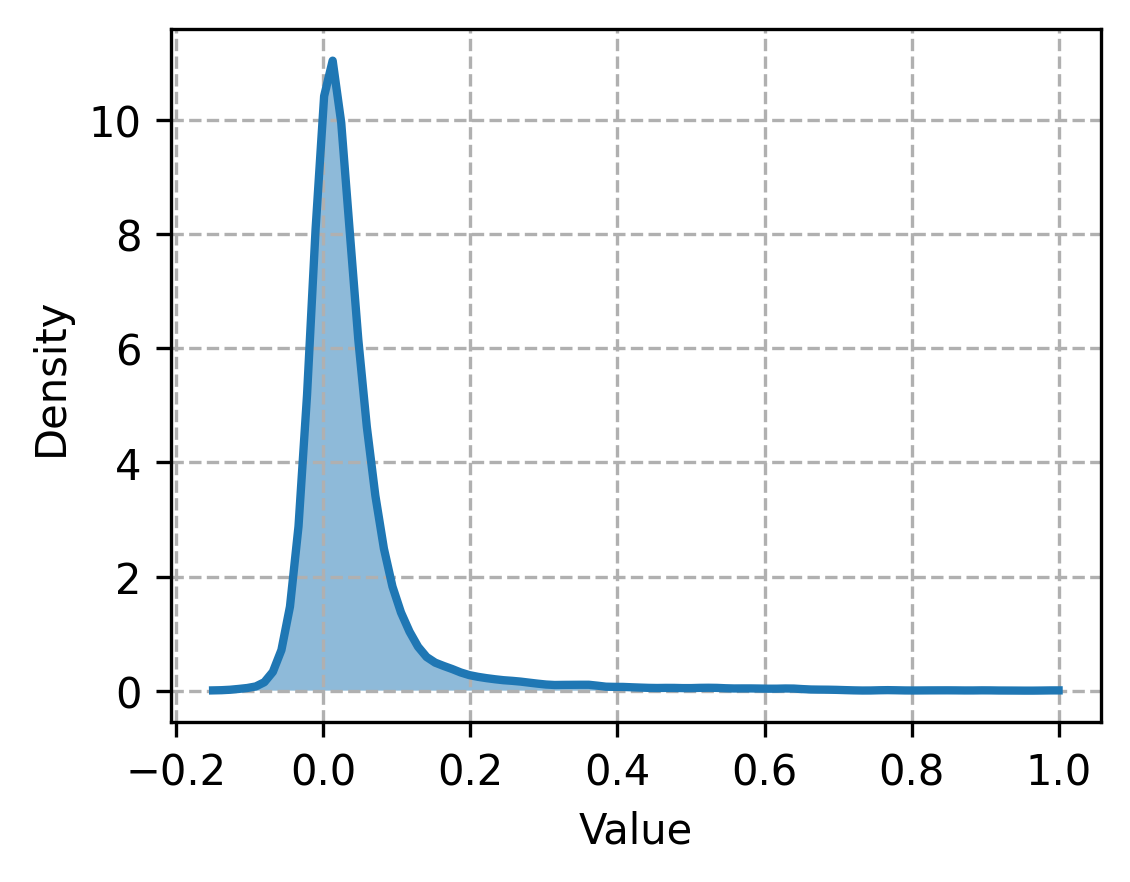

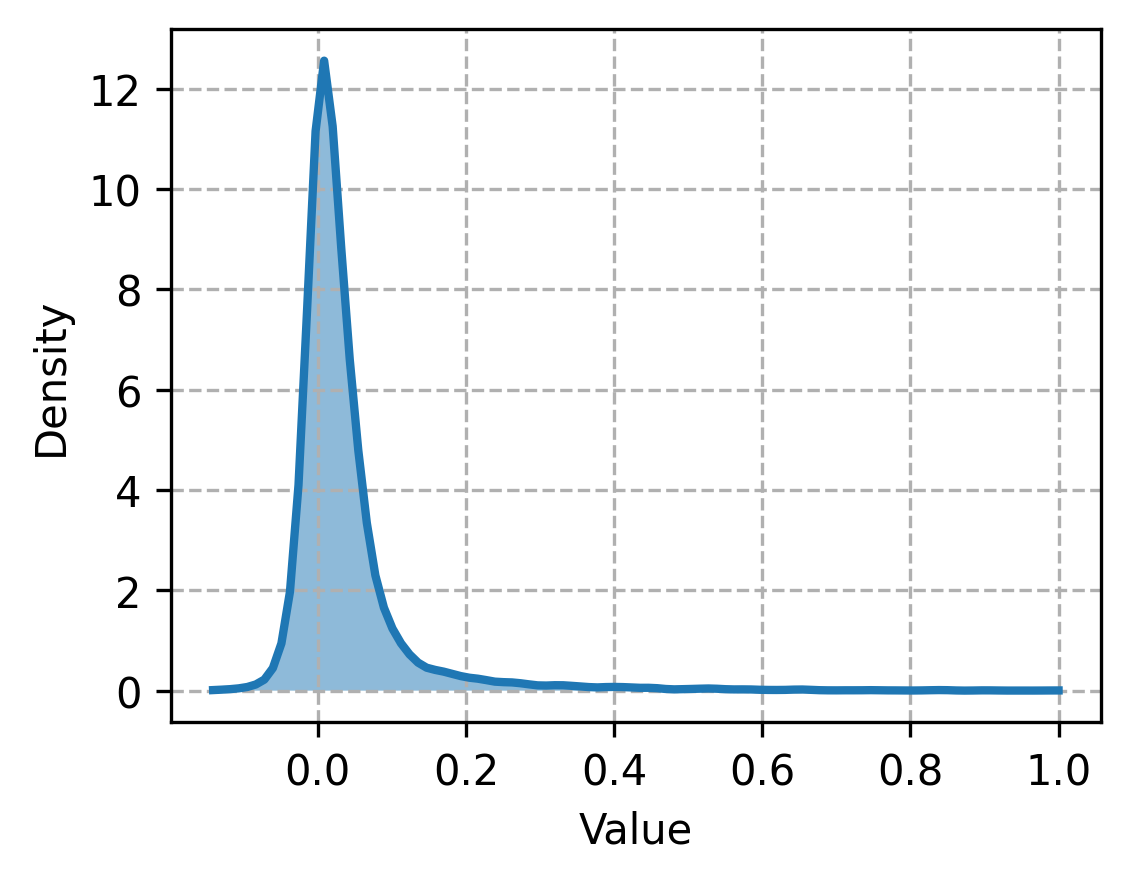

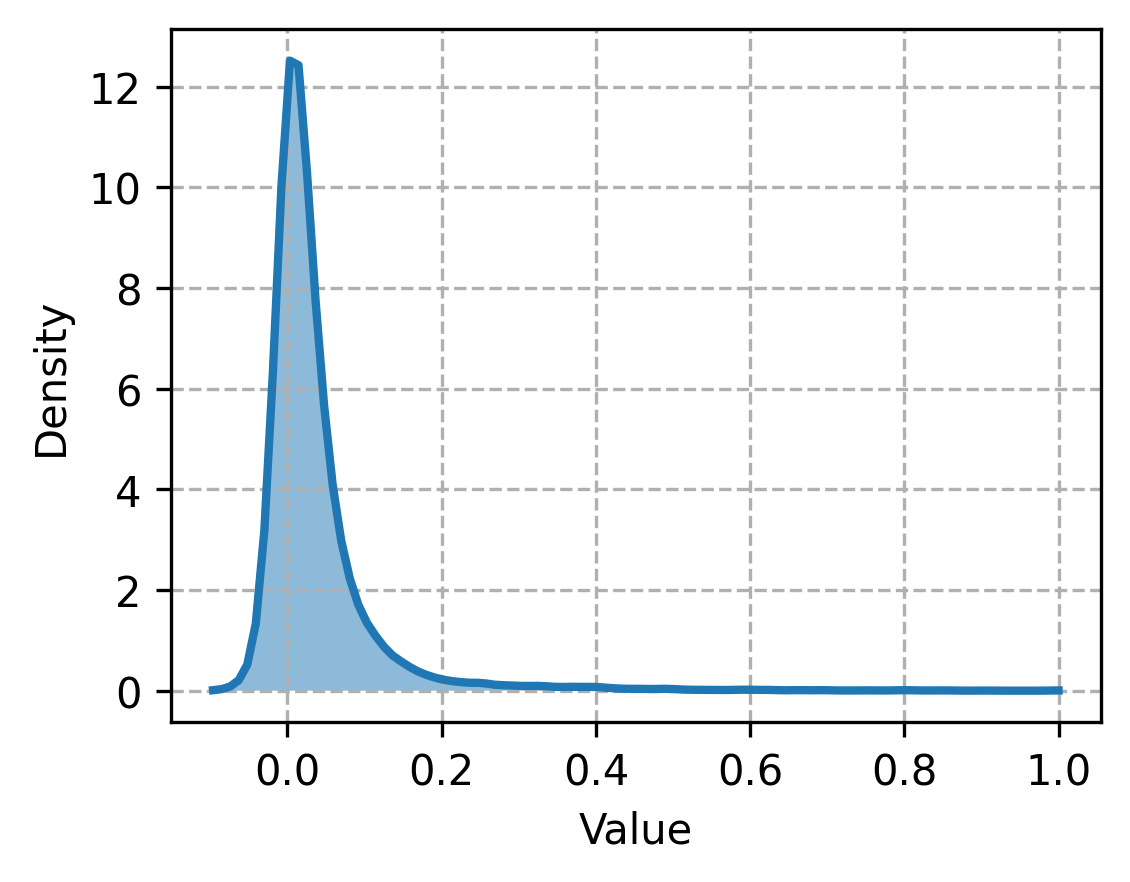

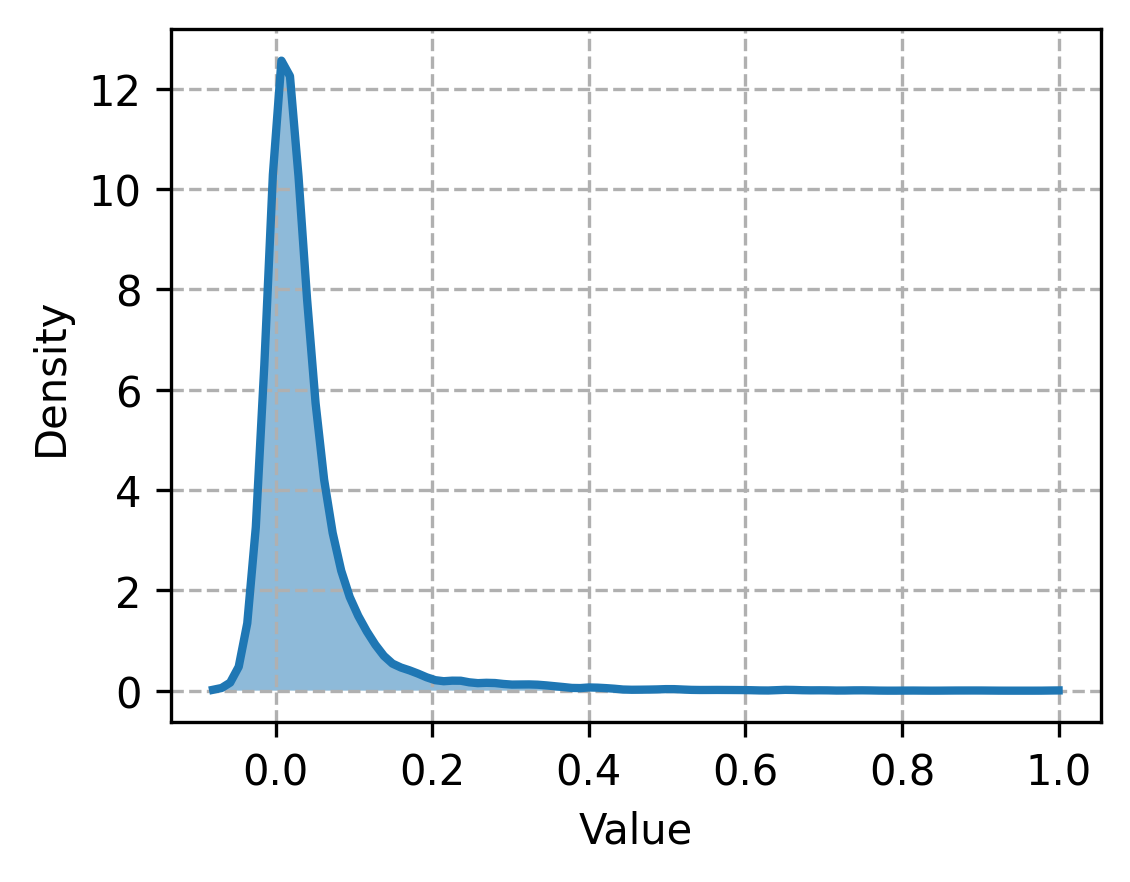

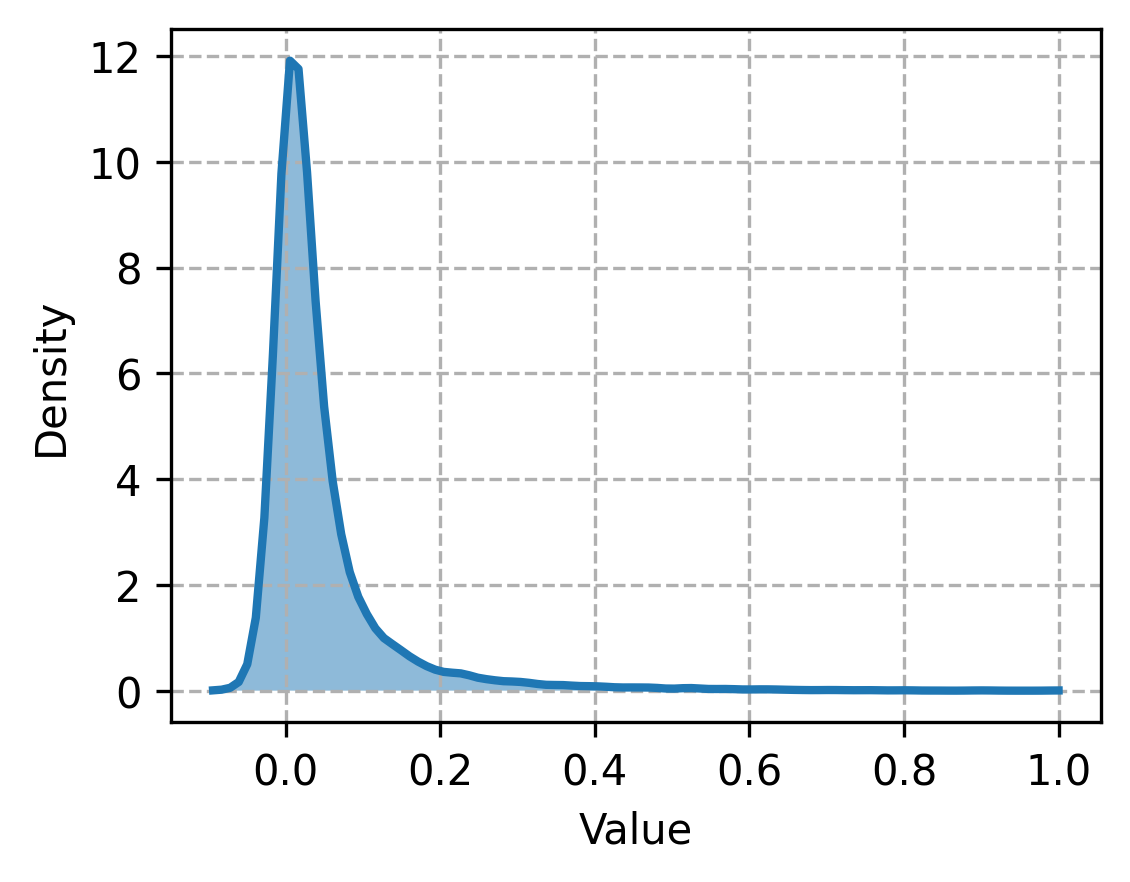

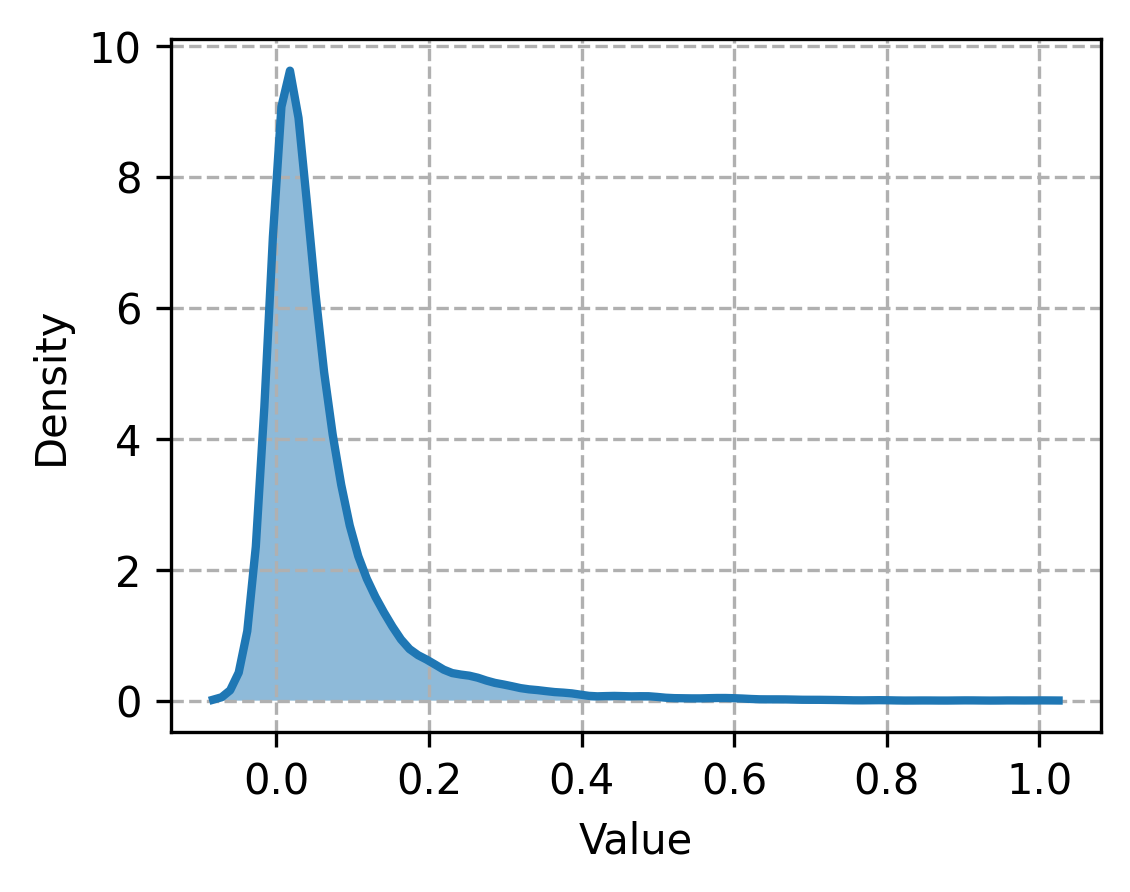

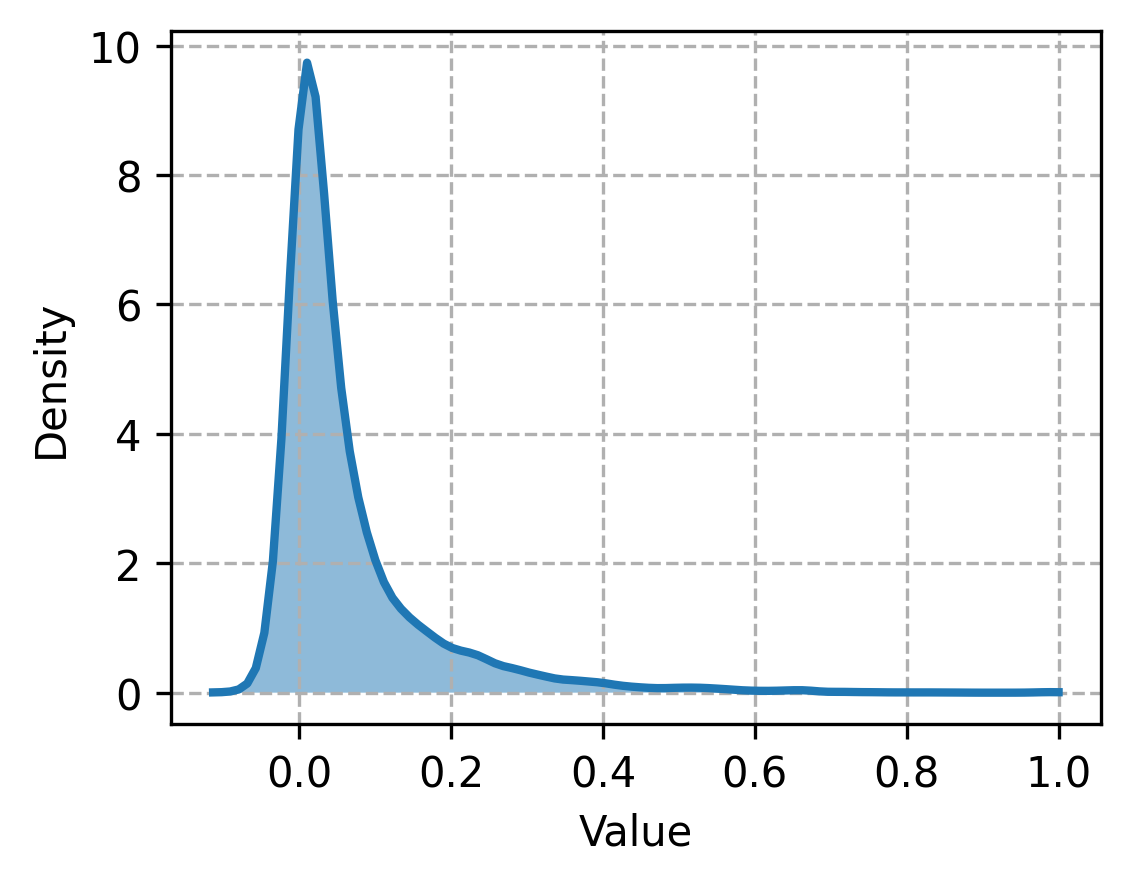

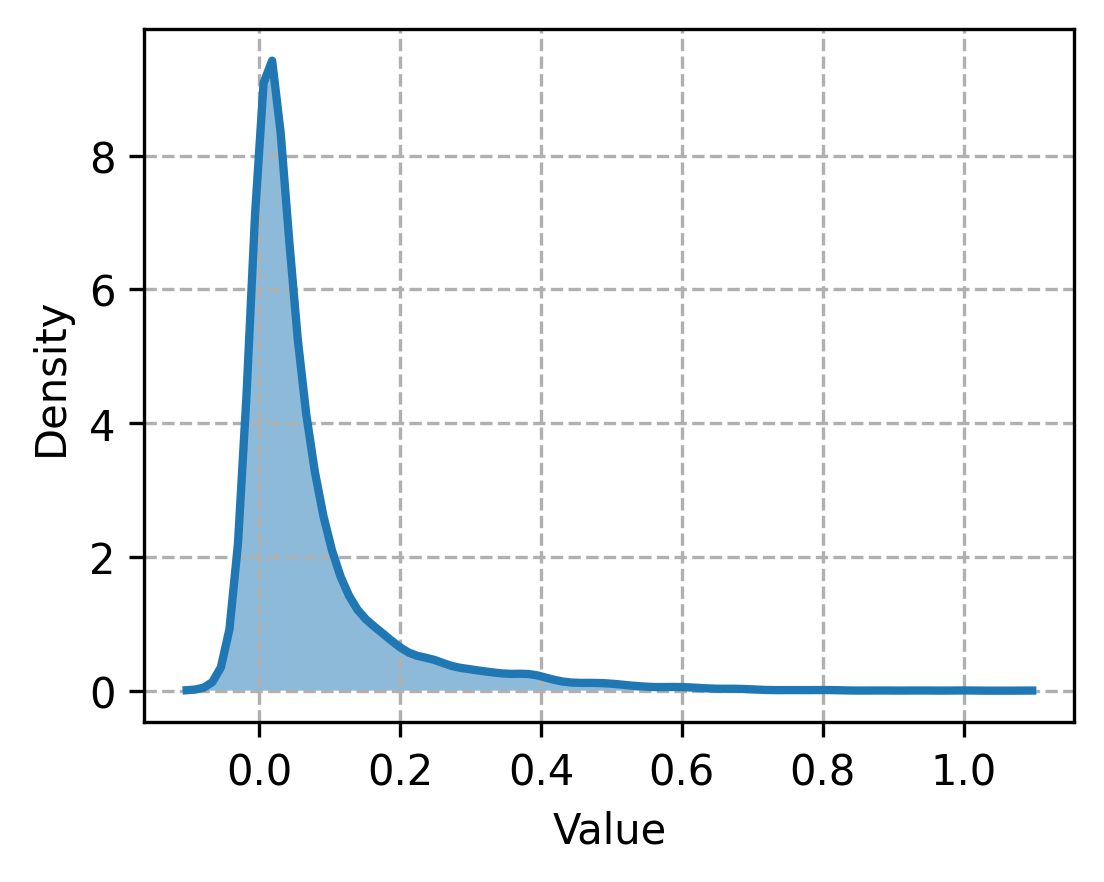

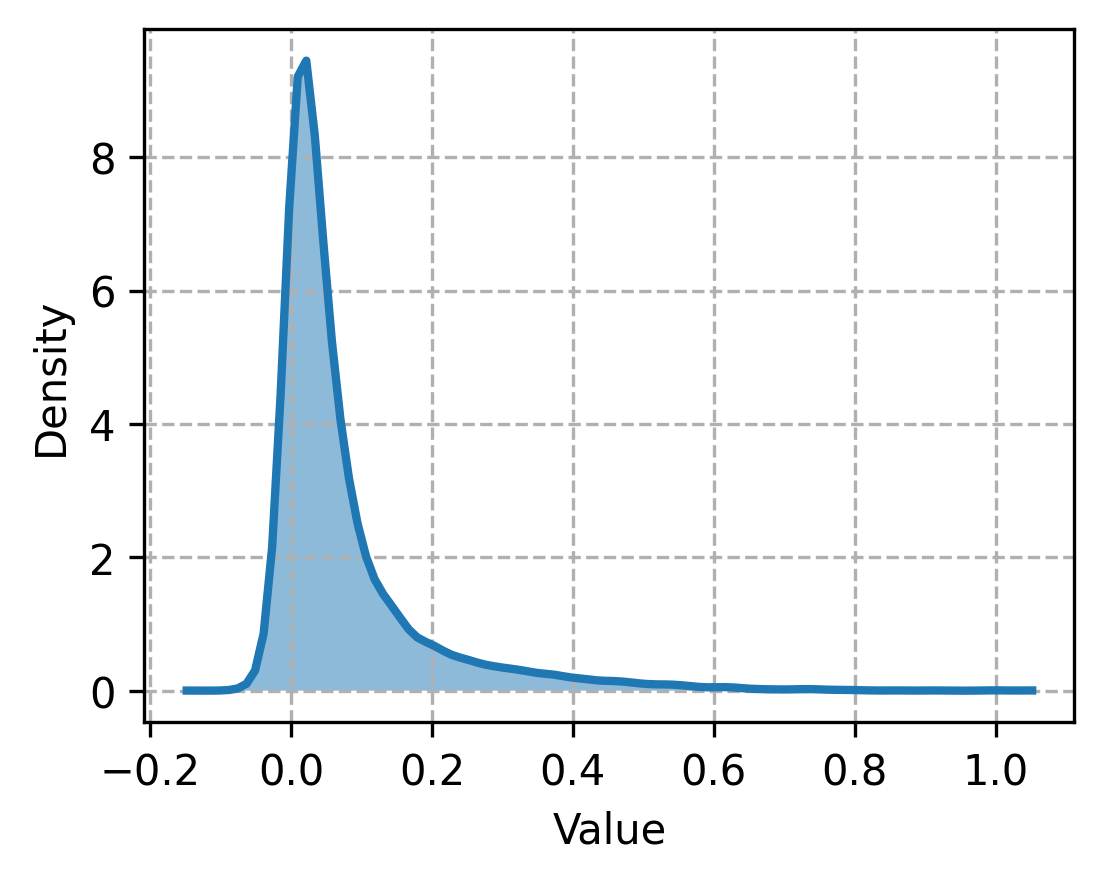

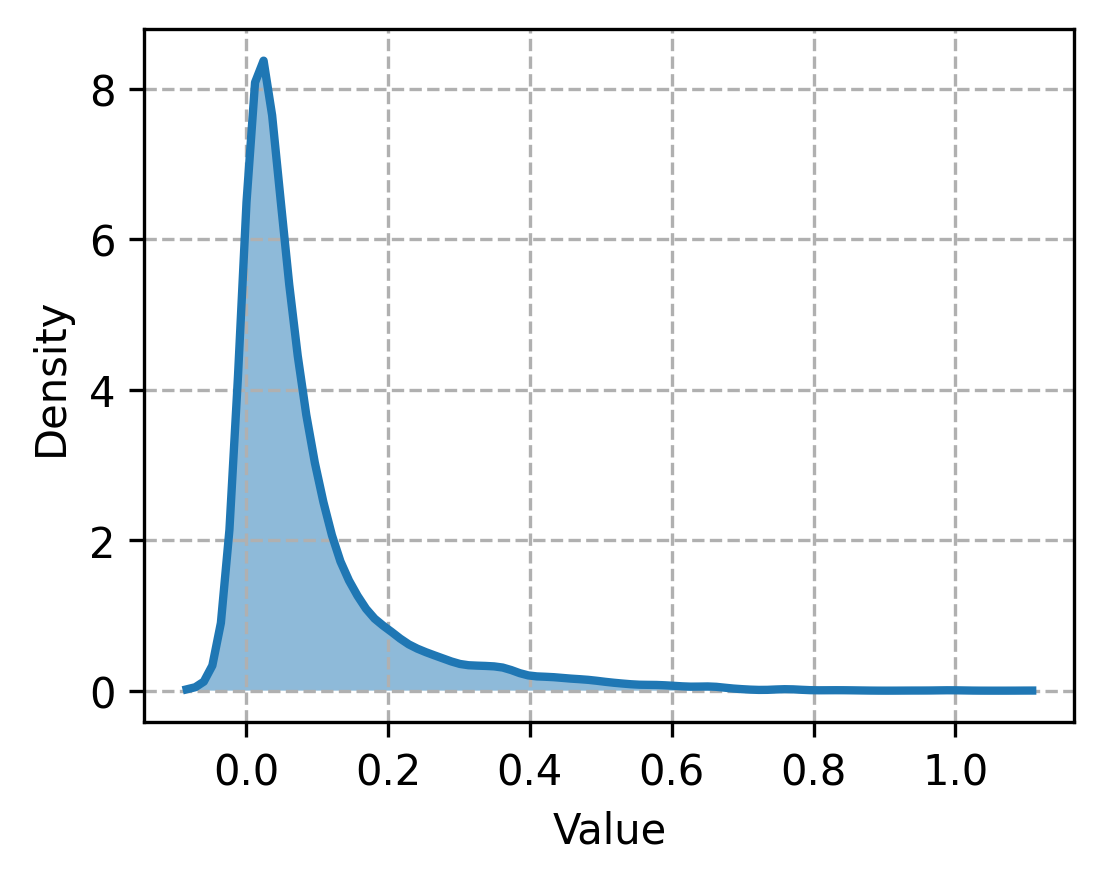

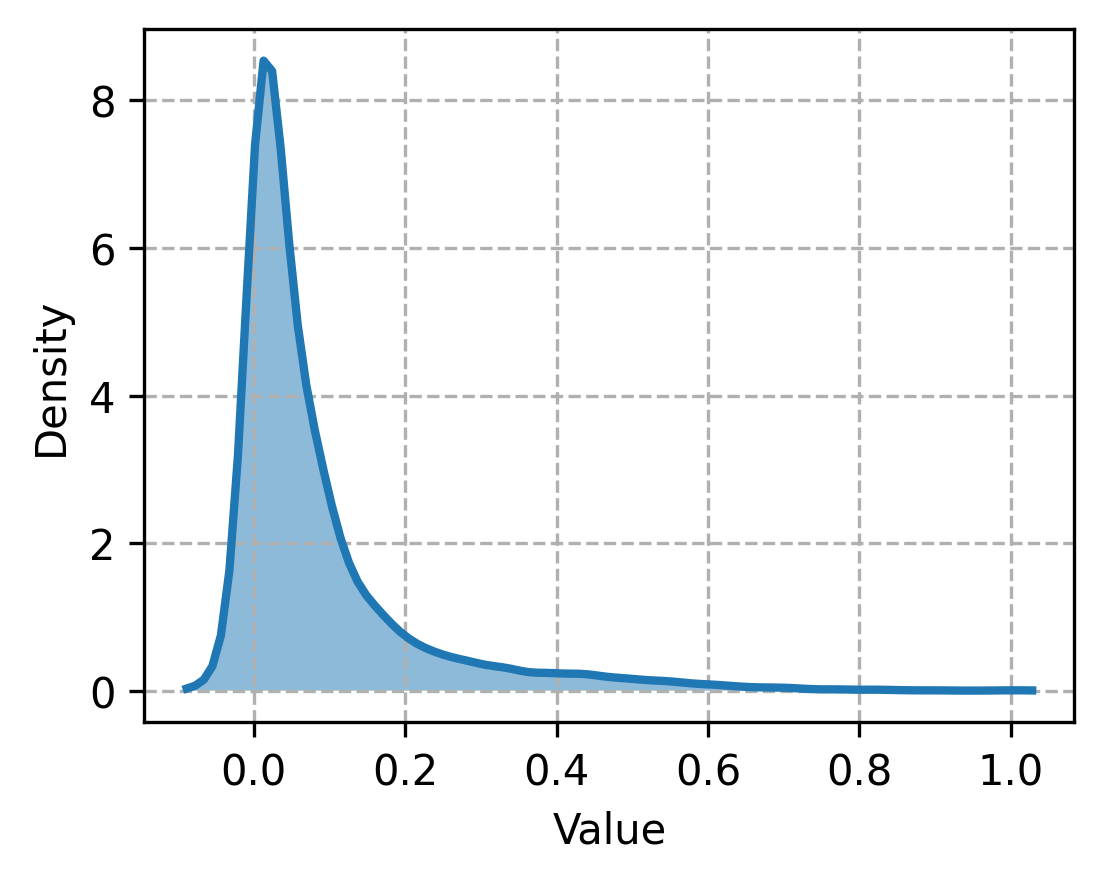

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

for i in range(len(p_matrices_flatten)):
    # 计算核密度估计
    kde = gaussian_kde(p_matrices_flatten[i])
    # 生成一维数值范围
    x = np.linspace(np.min(p_matrices_flatten[i]), np.max(p_matrices_flatten[i]), 100)
    # 绘制核密度估计曲线
    plt.figure(figsize=(4, 3), dpi=300)
    plt.plot(x, kde(x), linewidth=2)
    plt.fill_between(x, kde(x), alpha=0.5)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title(f'Density of Elements in P Matrix for Layer {i}')
    plt.grid(True, linestyle='--')
    # Save the figure as a high-resolution image
    #output_dir = f'{fig_dir}/{model_name}/{stat}/{knowledge_type}/KDE'
    #os.makedirs(output_dir, exist_ok=True)
    #plt.savefig(f"{output_dir}/superposition_for_layer_{i}.png", format='png', dpi=300, bbox_inches='tight')
    plt.show()


In [11]:
import numpy as np
from scipy.stats import kurtosis
# 分析逐层峭度

kurts = []

for i in range(len(p_matrices_flatten)):
    kurts.append(kurtosis(p_matrices_flatten[i]))

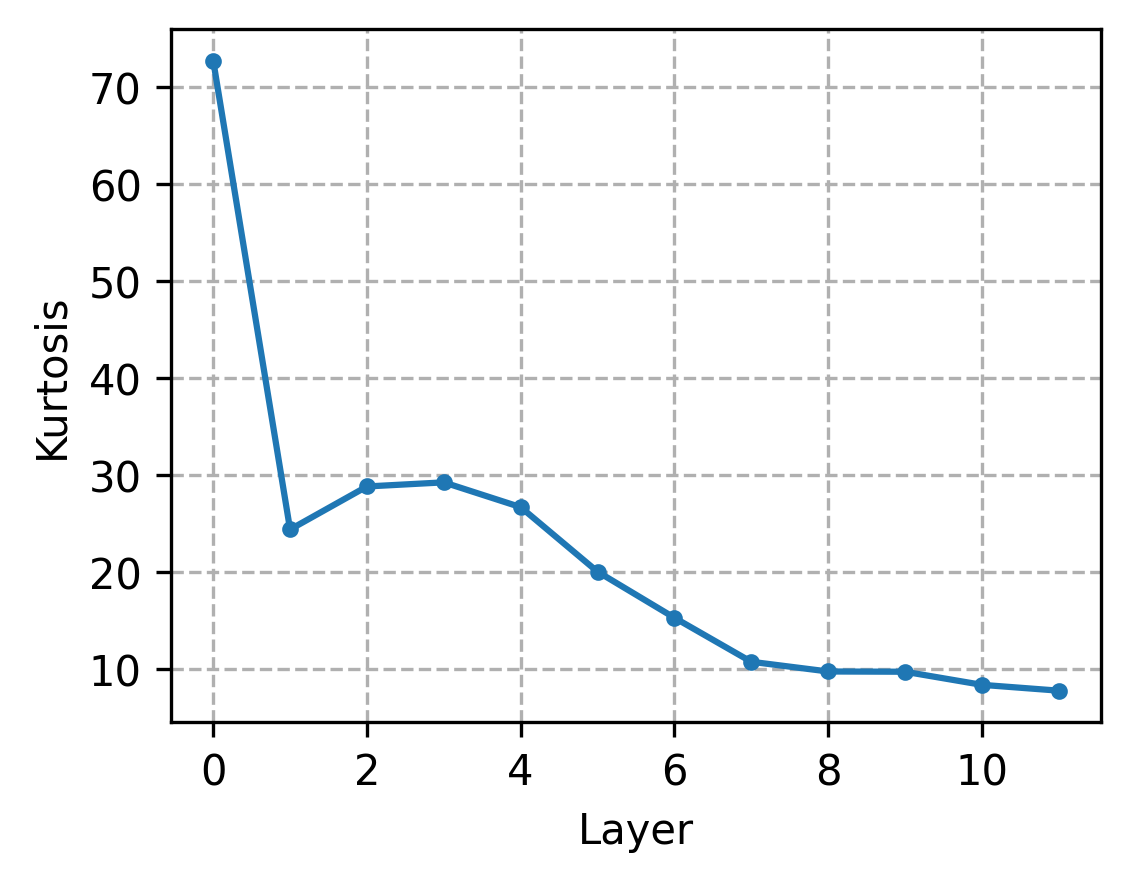

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3), dpi=300)
# 绘制折线图
plt.plot(range(len(kurts)), kurts, marker='.')

# 设置标题和标签
plt.title("Kurtosis across Layers")
plt.xlabel("Layer")
plt.ylabel("Kurtosis")

# 显示网格
plt.grid(True, linestyle='--')
# Save the figure as a high-resolution image
#output_dir = f'{fig_dir}/{model_name}/{stat}/{knowledge_type}/kurtosis'
#os.makedirs(output_dir, exist_ok=True)
#plt.savefig(f"{output_dir}/superposition_across_layers.png", format='png', dpi=300, bbox_inches='tight')
# 显示图形
plt.show()